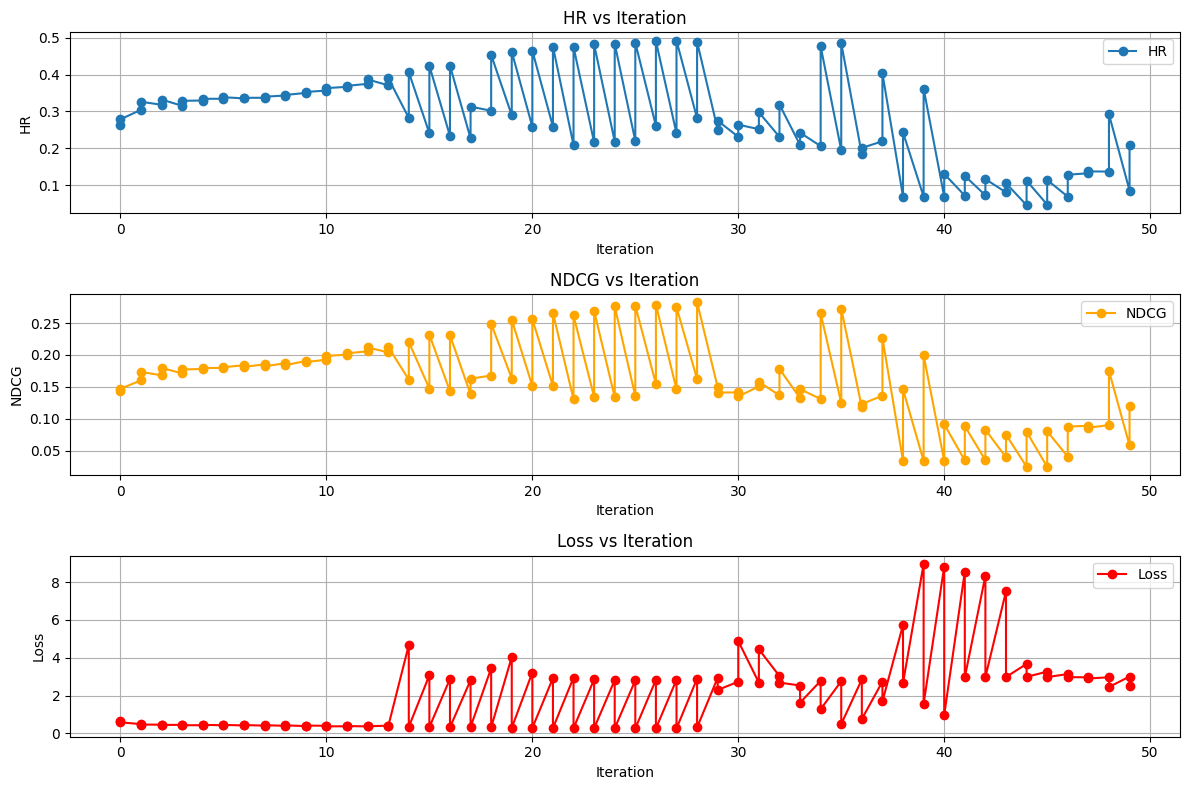

In [1]:
import os
import re
import matplotlib.pyplot as plt

# Directory containing the training log files
log_dir = "trainninglogs"

# Function to process a single log file and extract data
def process_log_file(log_file):
    iterations = []
    hrs = []
    ndcgs = []
    losses = []

    with open(log_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Match the training log pattern
            match = re.match(r"Iteration (\d+) \[\d+\.\d+ s\]: HR = ([\d\.]+), NDCG = ([\d\.]+), loss = ([\d\.]+)", line)
            if match:
                iterations.append(int(match.group(1)))
                hrs.append(float(match.group(2)))
                ndcgs.append(float(match.group(3)))
                losses.append(float(match.group(4)))

    return iterations, hrs, ndcgs, losses

# Read all log files in the directory
all_iterations = []
all_hrs = []
all_ndcgs = []
all_losses = []

for log_file in os.listdir(log_dir):
    if log_file.endswith(".log"):
        log_path = os.path.join(log_dir, log_file)
        iterations, hrs, ndcgs, losses = process_log_file(log_path)
        all_iterations.extend(iterations)
        all_hrs.extend(hrs)
        all_ndcgs.extend(ndcgs)
        all_losses.extend(losses)

# Sort data by iteration (in case of multiple log files)
sorted_data = sorted(zip(all_iterations, all_hrs, all_ndcgs, all_losses))
iterations, hrs, ndcgs, losses = zip(*sorted_data)

# Plot HR, NDCG, and loss
plt.figure(figsize=(12, 8))

# HR Plot
plt.subplot(3, 1, 1)
plt.plot(iterations, hrs, label="HR", marker='o')
plt.xlabel("Iteration")
plt.ylabel("HR")
plt.title("HR vs Iteration")
plt.grid()
plt.legend()

# NDCG Plot
plt.subplot(3, 1, 2)
plt.plot(iterations, ndcgs, label="NDCG", color="orange", marker='o')
plt.xlabel("Iteration")
plt.ylabel("NDCG")
plt.title("NDCG vs Iteration")
plt.grid()
plt.legend()

# Loss Plot
plt.subplot(3, 1, 3)
plt.plot(iterations, losses, label="Loss", color="red", marker='o')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.grid()
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [89]:
import pandas as pd
from io import StringIO


# Data for "no activity layer"
data_no_activity = """
Iteration,HR,NDCG,loss,type
0,0.2638,0.1442,0.6546,no activity layer
1,0.3047,0.1603,0.4849,no activity layer
2,0.3182,0.1681,0.4569,no activity layer
3,0.3155,0.171,0.4489,no activity layer
4,0.3344,0.1797,0.448,no activity layer
5,0.3386,0.1809,0.4435,no activity layer
6,0.3371,0.1813,0.4357,no activity layer
7,0.3401,0.1822,0.4301,no activity layer
8,0.3448,0.184,0.4205,no activity layer
9,0.3529,0.1887,0.4119,no activity layer
10,0.3567,0.1928,0.3973,no activity layer
11,0.3695,0.2026,0.3829,no activity layer
12,0.3749,0.2058,0.3664,no activity layer
13,0.3907,0.2126,0.3609,no activity layer
14,0.4065,0.2205,0.3379,no activity layer
15,0.4238,0.2317,0.326,no activity layer
16,0.4242,0.231,0.3166,no activity layer
17,0.3132,0.1629,0.3338,no activity layer
18,0.4535,0.2493,0.31,no activity layer
19,0.462,0.2552,0.2875,no activity layer
20,0.4647,0.2562,0.284,no activity layer
21,0.4759,0.2659,0.2767,no activity layer
22,0.4747,0.2619,0.2702,no activity layer
23,0.4817,0.2692,0.267,no activity layer
24,0.4836,0.2761,0.262,no activity layer
25,0.4867,0.2775,0.2582,no activity layer
26,0.4909,0.279,0.2566,no activity layer
27,0.4921,0.2751,0.255,no activity layer
28,0.489,0.2827,0.3115,no activity layer
29,0.275,0.1411,2.2939,no activity layer
30,0.2642,0.135,4.8808,no activity layer
31,0.2977,0.1581,4.4439,no activity layer
32,0.2314,0.1366,3.0284,no activity layer
33,0.2426,0.1464,1.619,no activity layer
34,0.4767,0.2652,1.2758,no activity layer
35,0.4855,0.2727,0.4859,no activity layer
36,0.2013,0.1232,0.7565,no activity layer
37,0.4034,0.2266,1.687,no activity layer
38,0.0694,0.034,5.735,no activity layer
39,0.0694,0.0339,8.9626,no activity layer
40,0.0694,0.0342,8.8172,no activity layer
41,0.0721,0.0347,8.5545,no activity layer
42,0.0729,0.0352,8.3344,no activity layer
43,0.081,0.0397,7.5071,no activity layer
44,0.0463,0.0249,3.6702,no activity layer
45,0.0478,0.0247,3.2619,no activity layer
46,0.0694,0.0407,3.1336,no activity layer
47,0.1377,0.086,2.9001,no activity layer
48,0.2923,0.1751,2.4491,no activity layer
49,0.2094,0.1196,2.4779,no activity layer
"""

# Data for "activity layer"
data_activity = """
Iteration,HR,NDCG,loss,type
0,0.2788,0.147,0.5826,activity layer
1,0.3263,0.1734,0.4634,activity layer
2,0.332,0.1798,0.4416,activity layer
3,0.329,0.1773,0.4278,activity layer
4,0.3297,0.1781,0.428,activity layer
5,0.3344,0.1797,0.4263,activity layer
6,0.3355,0.1839,0.4171,activity layer
7,0.3371,0.1854,0.4072,activity layer
8,0.3432,0.1872,0.3965,activity layer
9,0.3502,0.1906,0.3824,activity layer
10,0.3633,0.1984,0.3678,activity layer
11,0.3668,0.2007,0.3728,activity layer
12,0.3868,0.2118,0.3706,activity layer
13,0.371,0.2041,0.4061,activity layer
14,0.2827,0.1614,4.671,activity layer
15,0.241,0.1473,3.0747,activity layer
16,0.2337,0.1433,2.8778,activity layer
17,0.2272,0.1383,2.8112,activity layer
18,0.302,0.1678,3.4418,activity layer
19,0.2896,0.1631,4.0363,activity layer
20,0.2588,0.1513,3.2147,activity layer
21,0.2588,0.1514,2.9217,activity layer
22,0.209,0.1307,2.9449,activity layer
23,0.2167,0.1343,2.8533,activity layer
24,0.2187,0.1339,2.8153,activity layer
25,0.2202,0.1353,2.8033,activity layer
26,0.2611,0.1544,2.8296,activity layer
27,0.2406,0.1461,2.8317,activity layer
28,0.2815,0.1622,2.8955,activity layer
29,0.2511,0.1494,2.9393,activity layer
30,0.2314,0.1414,2.7304,activity layer
31,0.2522,0.1507,2.6813,activity layer
32,0.3189,0.1782,2.6829,activity layer
33,0.2094,0.1323,2.5292,activity layer
34,0.2063,0.1311,2.7762,activity layer
35,0.1948,0.1248,2.7556,activity layer
36,0.1836,0.1177,2.8524,activity layer
37,0.2194,0.1361,2.7364,activity layer
38,0.2433,0.1461,2.6578,activity layer
39,0.3621,0.1996,1.5545,activity layer
40,0.1311,0.0915,0.9642,activity layer
41,0.1257,0.0884,2.9565,activity layer
42,0.1169,0.0828,2.9763,activity layer
43,0.1057,0.0752,2.9778,activity layer
44,0.1126,0.0796,2.9886,activity layer
45,0.1145,0.0804,2.975,activity layer
46,0.1288,0.0878,2.9714,activity layer
47,0.1327,0.089,2.9626,activity layer
48,0.1373,0.0901,2.9646,activity layer
49,0.086,0.0582,3.005,activity layer
"""

# Convert the string data into DataFrames
df_no_activity = pd.read_csv( StringIO(data_no_activity))
df_activity = pd.read_csv( StringIO(data_activity))

# Combine the DataFrames
df_combined = pd.concat([df_no_activity, df_activity])

# Save the DataFrame as a CSV file
csv_path = "./experement-result/gh-iteration_results.csv"
df_combined.to_csv(csv_path, index=False)


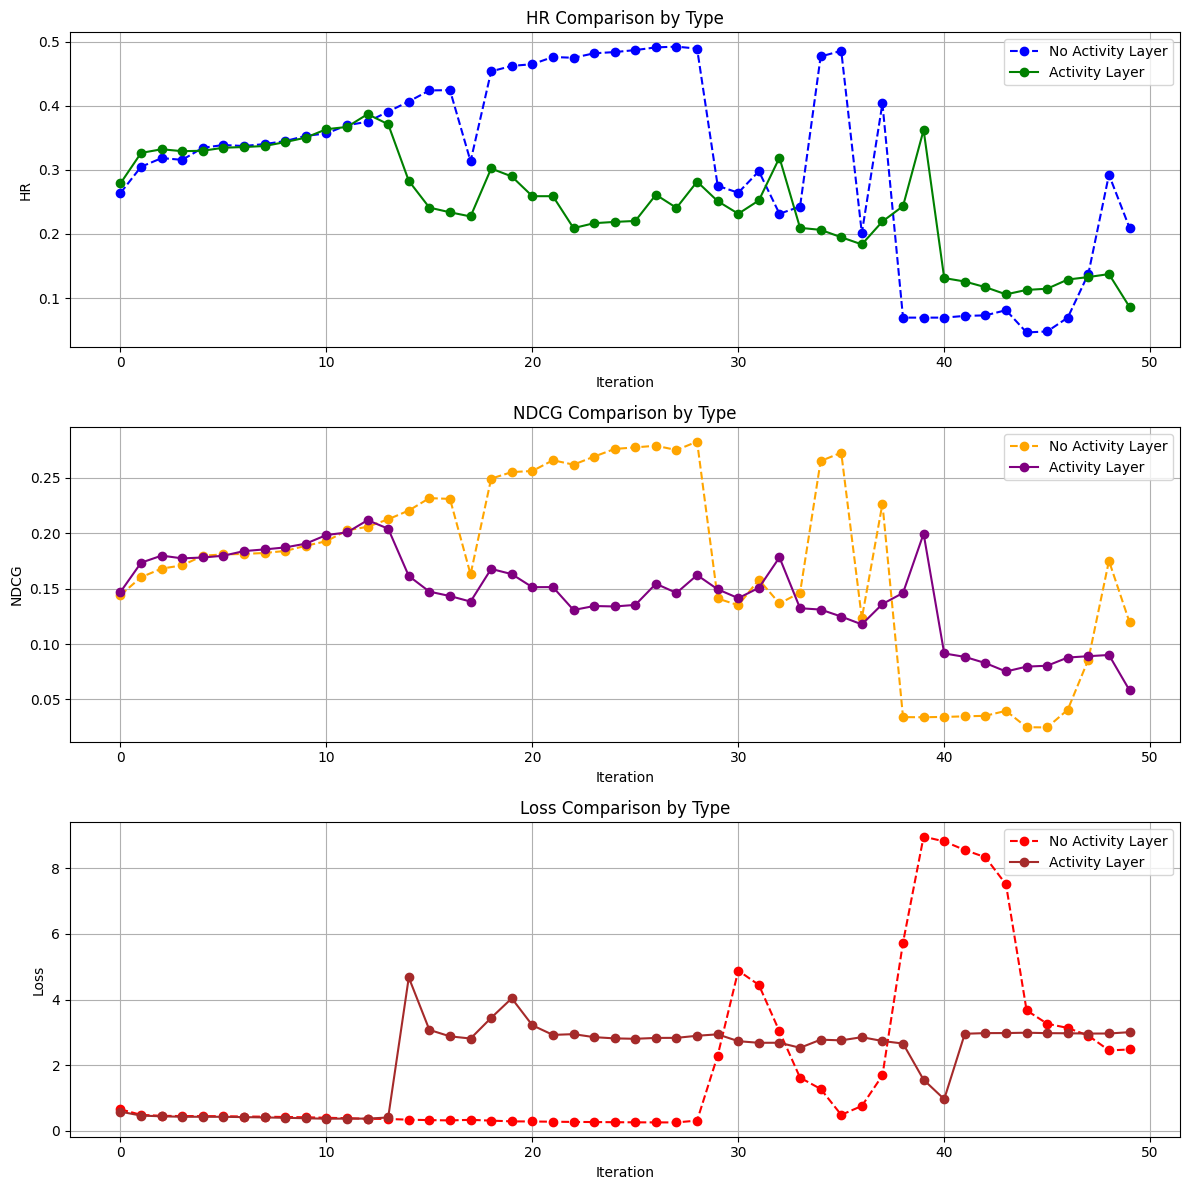

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
CSV_PATH = "./experement-result/gh-iteration_results.csv"

# Read the CSV file
df = pd.read_csv(CSV_PATH)

# Ensure the necessary columns exist
required_columns = ["Iteration", "HR", "NDCG", "loss"]

if all(col in df.columns for col in required_columns):
        # Separate the data by type
    no_activity_layer = df[df["type"] == "no activity layer"]
    activity_layer = df[df["type"] == "activity layer"]

    # Plot comparisons
    plt.figure(figsize=(12, 12))

    # HR Comparison
    plt.subplot(3, 1, 1)
    plt.plot(no_activity_layer["Iteration"], no_activity_layer["HR"], label="No Activity Layer", marker='o', linestyle='--', color="blue")
    plt.plot(activity_layer["Iteration"], activity_layer["HR"], label="Activity Layer", marker='o', linestyle='-', color="green")
    plt.xlabel("Iteration")
    plt.ylabel("HR")
    plt.title("HR Comparison by Type")
    plt.grid()
    plt.legend()

    # NDCG Comparison
    plt.subplot(3, 1, 2)
    plt.plot(no_activity_layer["Iteration"], no_activity_layer["NDCG"], label="No Activity Layer", marker='o', linestyle='--', color="orange")
    plt.plot(activity_layer["Iteration"], activity_layer["NDCG"], label="Activity Layer", marker='o', linestyle='-', color="purple")
    plt.xlabel("Iteration")
    plt.ylabel("NDCG")
    plt.title("NDCG Comparison by Type")
    plt.grid()
    plt.legend()

    # Loss Comparison
    plt.subplot(3, 1, 3)
    plt.plot(no_activity_layer["Iteration"], no_activity_layer["loss"], label="No Activity Layer", marker='o', linestyle='--', color="red")
    plt.plot(activity_layer["Iteration"], activity_layer["loss"], label="Activity Layer", marker='o', linestyle='-', color="brown")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss Comparison by Type")
    plt.grid()
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
else:
    print("Error: CSV file does not contain the required columns:", required_columns)


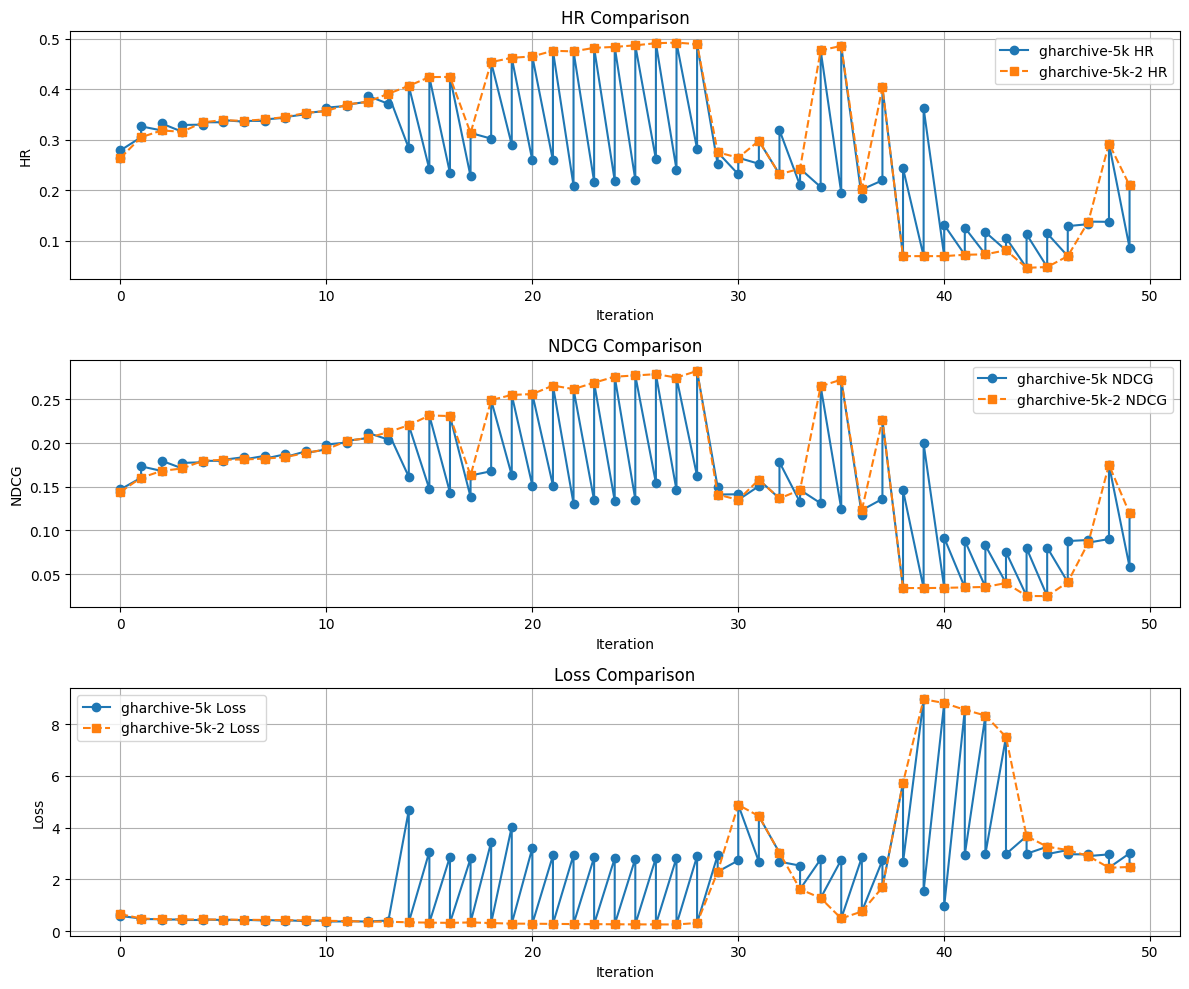

In [2]:
import os
import re
import matplotlib.pyplot as plt

# Directory containing the training log files
log_dir = "trainninglogs"

# Function to process a single log file and extract data
def process_log_file(log_file):
    iterations = []
    hrs = []
    ndcgs = []
    losses = []

    with open(log_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Match the training log pattern
            match = re.match(r"Iteration (\d+) \[\d+\.\d+ s\]: HR = ([\d\.]+), NDCG = ([\d\.]+), loss = ([\d\.]+)", line)
            if match:
                iterations.append(int(match.group(1)))
                hrs.append(float(match.group(2)))
                ndcgs.append(float(match.group(3)))
                losses.append(float(match.group(4)))

    return iterations, hrs, ndcgs, losses

# Function to extract data for logs starting with a specific prefix
def extract_data_for_prefix(prefix):
    all_iterations = []
    all_hrs = []
    all_ndcgs = []
    all_losses = []

    for log_file in os.listdir(log_dir):
        if log_file.startswith(prefix) and log_file.endswith(".log"):
            log_path = os.path.join(log_dir, log_file)
            iterations, hrs, ndcgs, losses = process_log_file(log_path)
            all_iterations.extend(iterations)
            all_hrs.extend(hrs)
            all_ndcgs.extend(ndcgs)
            all_losses.extend(losses)

    # Sort data by iteration
    sorted_data = sorted(zip(all_iterations, all_hrs, all_ndcgs, all_losses))
    return zip(*sorted_data) if sorted_data else ([], [], [], [])

# Extract data for the two datasets
iterations_1, hrs_1, ndcgs_1, losses_1 = extract_data_for_prefix("gharchive-5k")
iterations_2, hrs_2, ndcgs_2, losses_2 = extract_data_for_prefix("gharchive-5k-2")

# Plot HR, NDCG, and loss comparisons
plt.figure(figsize=(12, 10))

# HR Comparison
plt.subplot(3, 1, 1)
plt.plot(iterations_1, hrs_1, label="gharchive-5k with activity layer  HR", marker='o', linestyle='-')
plt.plot(iterations_2, hrs_2, label="gharchive-5k no activity layer HR", marker='s', linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("HR")
plt.title("HR Comparison")
plt.grid()
plt.legend()

# NDCG Comparison
plt.subplot(3, 1, 2)
plt.plot(iterations_1, ndcgs_1, label="gharchive-5k with activity layer NDCG", marker='o', linestyle='-')
plt.plot(iterations_2, ndcgs_2, label="gharchive-5k no activity layer NDCG", marker='s', linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("NDCG")
plt.title("NDCG Comparison")
plt.grid()
plt.legend()

# Loss Comparison
plt.subplot(3, 1, 3)
plt.plot(iterations_1, losses_1, label="gharchive-5k with activity layer Loss", marker='o', linestyle='-')
plt.plot(iterations_2, losses_2, label="gharchive-5k no activity layer Loss", marker='s', linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.grid()
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("./chart/reproduce/hr_ndcg_loss_performance_iteration.png", dpi=300)
plt.show()



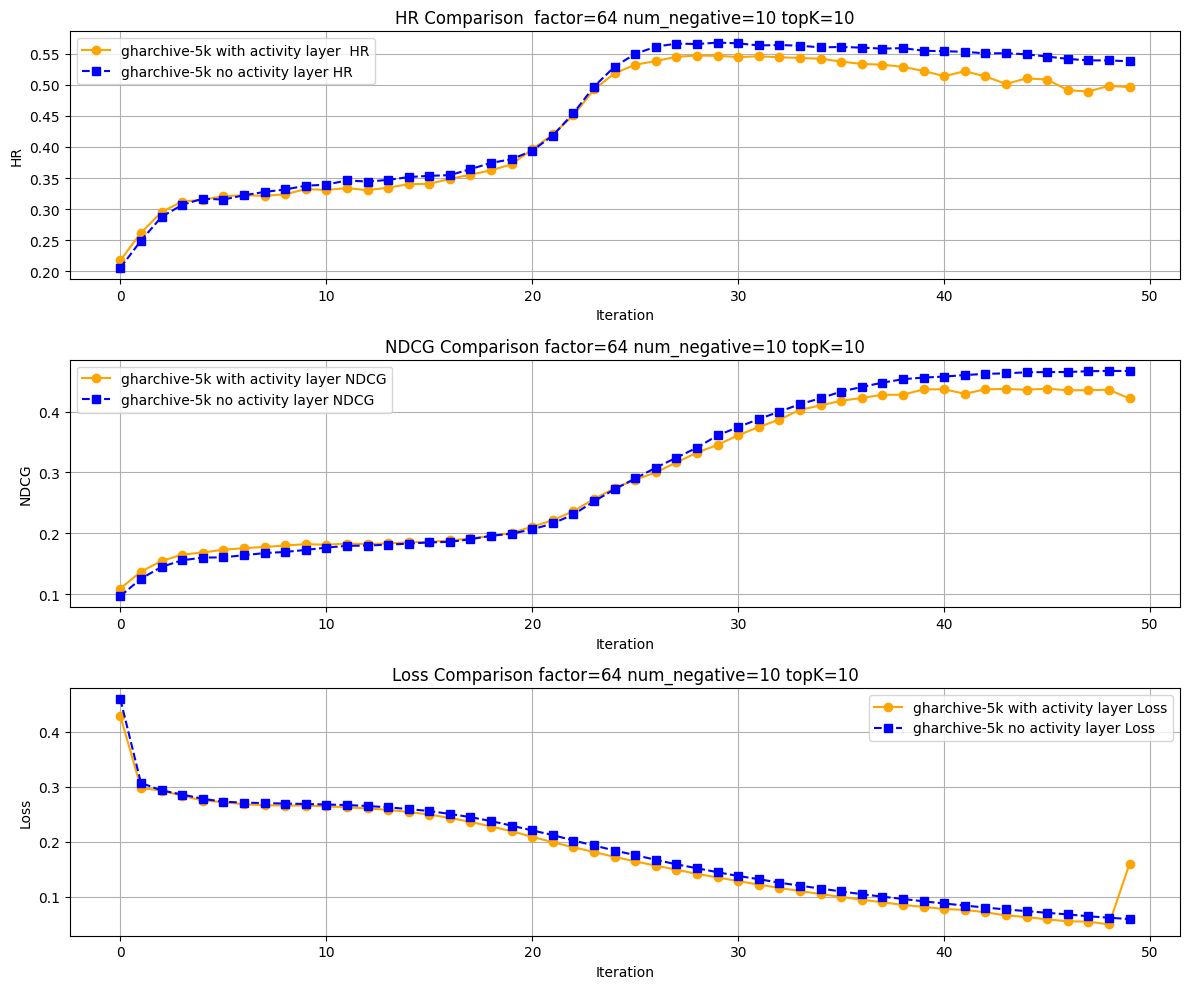

In [127]:
import os
import re
import matplotlib.pyplot as plt

# Directory containing the training log files
log_dir = "trainninglogs"

# Function to process a single log file and extract data
def process_log_file(log_file):
    iterations = []
    hrs = []
    ndcgs = []
    losses = []

    with open(log_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Match the training log pattern
            match = re.match(r"Iteration (\d+) \[\d+\.\d+ s\]: HR = ([\d\.]+), NDCG = ([\d\.]+), loss = ([\d\.]+)", line)
            if match:
                iterations.append(int(match.group(1)))
                hrs.append(float(match.group(2)))
                ndcgs.append(float(match.group(3)))
                losses.append(float(match.group(4)))

    return iterations, hrs, ndcgs, losses

# Function to extract data for logs starting with a specific prefix
def extract_data_for_prefix(prefix):
    all_iterations = []
    all_hrs = []
    all_ndcgs = []
    all_losses = []

    for log_file in os.listdir(log_dir):
        if log_file.startswith(prefix) and log_file.endswith(".log"):
            log_path = os.path.join(log_dir, log_file)
            iterations, hrs, ndcgs, losses = process_log_file(log_path)
            all_iterations.extend(iterations)
            all_hrs.extend(hrs)
            all_ndcgs.extend(ndcgs)
            all_losses.extend(losses)

    # Sort data by iteration
    sorted_data = sorted(zip(all_iterations, all_hrs, all_ndcgs, all_losses))
    return zip(*sorted_data) if sorted_data else ([], [], [], [])

# Extract data for the two datasets
iterations_1, hrs_1, ndcgs_1, losses_1 = extract_data_for_prefix("gharchive-5k_NeuMF_8_[96,48,24,12]_1736478578")
iterations_2, hrs_2, ndcgs_2, losses_2 = extract_data_for_prefix("gharchive-5k-2_NeuMF_64_[64,32,16,8]_1736478568")

# Plot HR, NDCG, and loss comparisons
plt.figure(figsize=(12, 10))

# HR Comparison
plt.subplot(3, 1, 1)
plt.plot(iterations_1, hrs_1, label="gharchive-5k with activity layer  HR", marker='o', linestyle='-',color='orange' )
plt.plot(iterations_2, hrs_2, label="gharchive-5k no activity layer HR", marker='s', linestyle='--',color='blue')
plt.xlabel("Iteration")
plt.ylabel("HR")
plt.title("HR Comparison  factor=64 num_negative=10 topK=10")
plt.grid()
plt.legend()

# NDCG Comparison
plt.subplot(3, 1, 2)
plt.plot(iterations_1, ndcgs_1, label="gharchive-5k with activity layer NDCG", marker='o', linestyle='-',color='orange')
plt.plot(iterations_2, ndcgs_2, label="gharchive-5k no activity layer NDCG", marker='s', linestyle='--',color='blue')
plt.xlabel("Iteration")
plt.ylabel("NDCG")
plt.title("NDCG Comparison factor=64 num_negative=10 topK=10")
plt.grid()
plt.legend()

# Loss Comparison
plt.subplot(3, 1, 3)
plt.plot(iterations_1, losses_1, label="gharchive-5k with activity layer Loss", marker='o', linestyle='-',color='orange')
plt.plot(iterations_2, losses_2, label="gharchive-5k no activity layer Loss", marker='s', linestyle='--',color='blue')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Comparison factor=64 num_negative=10 topK=10")
plt.grid()
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("./chart/reproduce/hr_ndcg_loss_performance_iteration.png", dpi=300)
plt.show()



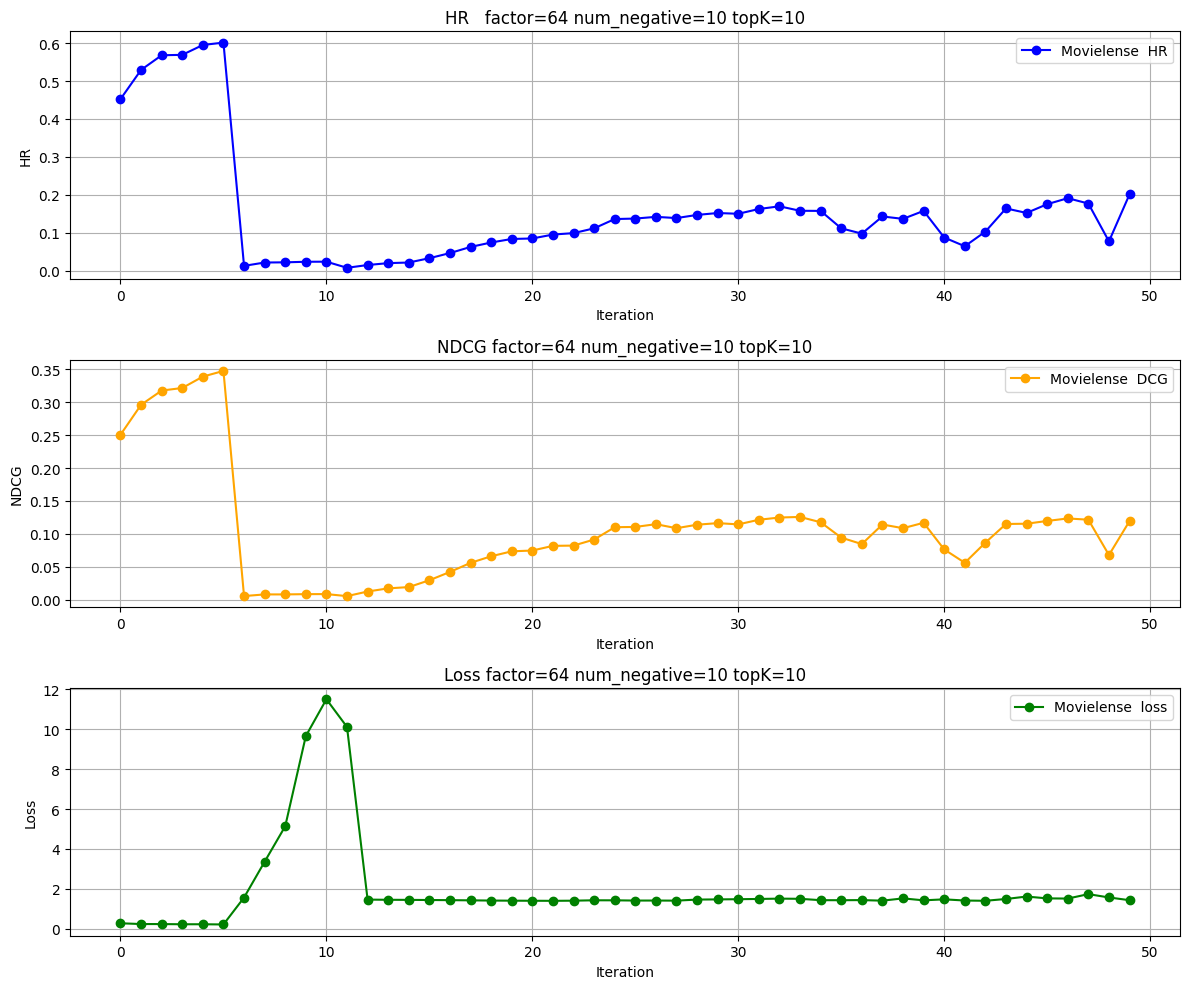

In [129]:
import os
import re
import matplotlib.pyplot as plt

# Directory containing the training log files
log_dir = "trainninglogs"

# Function to process a single log file and extract data
def process_log_file(log_file):
    iterations = []
    hrs = []
    ndcgs = []
    losses = []

    with open(log_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Match the training log pattern
            match = re.match(r"Iteration (\d+) \[\d+\.\d+ s\]: HR = ([\d\.]+), NDCG = ([\d\.]+), loss = ([\d\.]+)", line)
            if match:
                iterations.append(int(match.group(1)))
                hrs.append(float(match.group(2)))
                ndcgs.append(float(match.group(3)))
                losses.append(float(match.group(4)))

    return iterations, hrs, ndcgs, losses

# Function to extract data for logs starting with a specific prefix
def extract_data_for_prefix(prefix):
    all_iterations = []
    all_hrs = []
    all_ndcgs = []
    all_losses = []

    for log_file in os.listdir(log_dir):
        if log_file.startswith(prefix) and log_file.endswith(".log"):
            log_path = os.path.join(log_dir, log_file)
            iterations, hrs, ndcgs, losses = process_log_file(log_path)
            all_iterations.extend(iterations)
            all_hrs.extend(hrs)
            all_ndcgs.extend(ndcgs)
            all_losses.extend(losses)

    # Sort data by iteration
    sorted_data = sorted(zip(all_iterations, all_hrs, all_ndcgs, all_losses))
    return zip(*sorted_data) if sorted_data else ([], [], [], [])

# Extract data for the two datasets
iterations_1, hrs_1, ndcgs_1, losses_1 = extract_data_for_prefix("ml-1m_NeuMF_64_[64,32,16,8]_1736483092")


# Plot HR, NDCG, and loss comparisons
plt.figure(figsize=(12, 10))

# HR Comparison
plt.subplot(3, 1, 1)
plt.plot(iterations_1, hrs_1, label="Movielense  HR", marker='o', linestyle='-',color='blue')
plt.xlabel("Iteration")
plt.ylabel("HR")
plt.title("HR   factor=64 num_negative=10 topK=10")
plt.grid()
plt.legend()

# NDCG Comparison
plt.subplot(3, 1, 2)
plt.plot(iterations_1, ndcgs_1, label="Movielense  DCG", marker='o', linestyle='-',color='orange')
plt.xlabel("Iteration")
plt.ylabel("NDCG")
plt.title("NDCG factor=64 num_negative=10 topK=10")
plt.grid()
plt.legend()

# Loss Comparison
plt.subplot(3, 1, 3)
plt.plot(iterations_1, losses_1, label="Movielense  loss", marker='o', linestyle='-',color='green')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss factor=64 num_negative=10 topK=10")
plt.grid()
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("./chart/reproduce/hr_ndcg_loss_performance_iteration.png", dpi=300)
plt.show()



Batch default 256

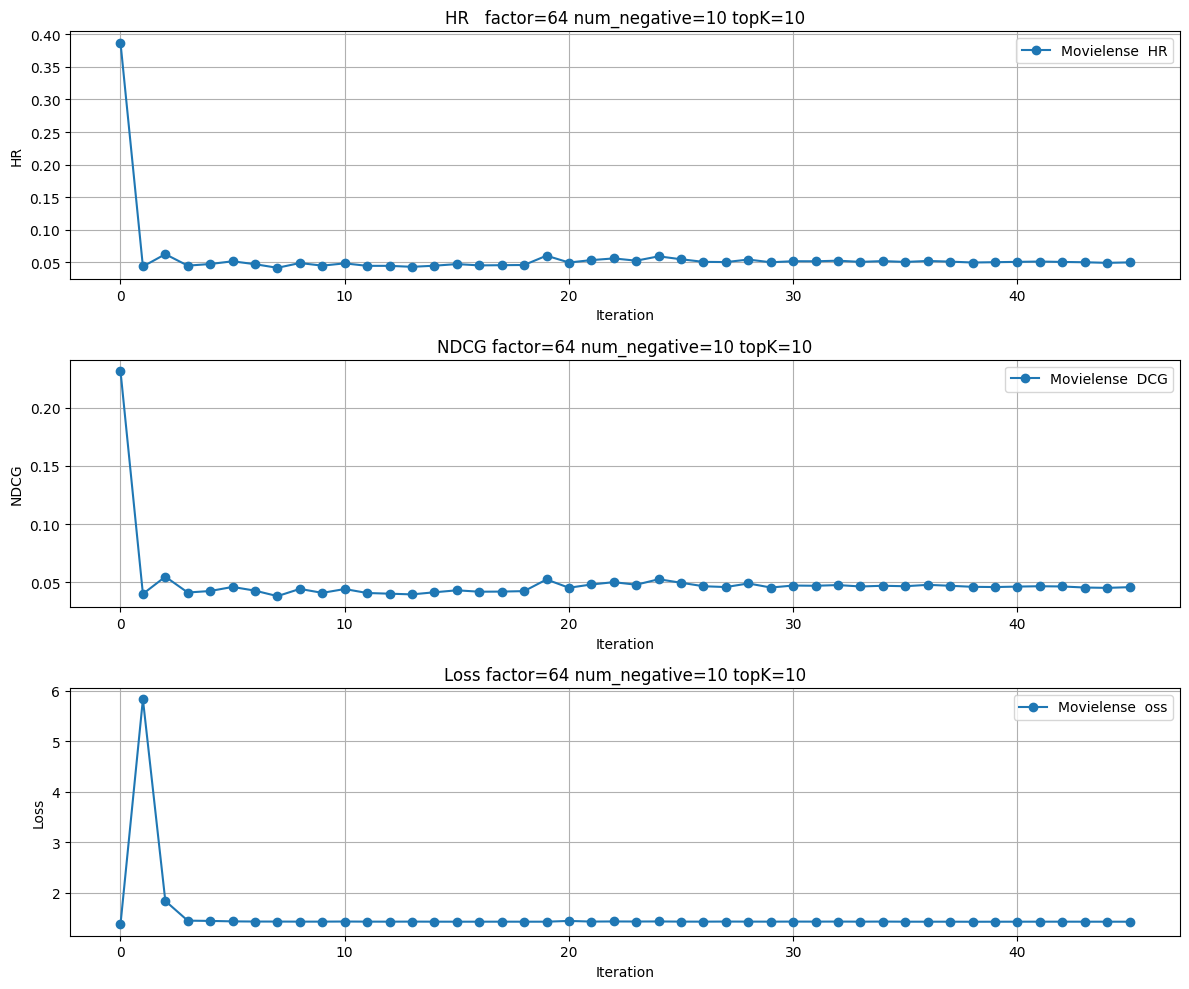

In [130]:
import os
import re
import matplotlib.pyplot as plt

# Directory containing the training log files
log_dir = "trainninglogs"

# Function to process a single log file and extract data
def process_log_file(log_file):
    iterations = []
    hrs = []
    ndcgs = []
    losses = []

    with open(log_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Match the training log pattern
            match = re.match(r"Iteration (\d+) \[\d+\.\d+ s\]: HR = ([\d\.]+), NDCG = ([\d\.]+), loss = ([\d\.]+)", line)
            if match:
                iterations.append(int(match.group(1)))
                hrs.append(float(match.group(2)))
                ndcgs.append(float(match.group(3)))
                losses.append(float(match.group(4)))

    return iterations, hrs, ndcgs, losses

# Function to extract data for logs starting with a specific prefix
def extract_data_for_prefix(prefix):
    all_iterations = []
    all_hrs = []
    all_ndcgs = []
    all_losses = []

    for log_file in os.listdir(log_dir):
        if log_file.startswith(prefix) and log_file.endswith(".log"):
            log_path = os.path.join(log_dir, log_file)
            iterations, hrs, ndcgs, losses = process_log_file(log_path)
            all_iterations.extend(iterations)
            all_hrs.extend(hrs)
            all_ndcgs.extend(ndcgs)
            all_losses.extend(losses)

    # Sort data by iteration
    sorted_data = sorted(zip(all_iterations, all_hrs, all_ndcgs, all_losses))
    return zip(*sorted_data) if sorted_data else ([], [], [], [])

# Extract data for the two datasets
iterations_1, hrs_1, ndcgs_1, losses_1 = extract_data_for_prefix("ml-1m_NeuMF_64_[64,32,16,8]_1736483766")


# Plot HR, NDCG, and loss comparisons
plt.figure(figsize=(12, 10))

# HR Comparison
plt.subplot(3, 1, 1)
plt.plot(iterations_1, hrs_1, label="Movielense  HR", marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("HR")
plt.title("HR   factor=64 num_negative=10 topK=10")
plt.grid()
plt.legend()

# NDCG Comparison
plt.subplot(3, 1, 2)
plt.plot(iterations_1, ndcgs_1, label="Movielense  DCG", marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("NDCG")
plt.title("NDCG factor=64 num_negative=10 topK=10")
plt.grid()
plt.legend()

# Loss Comparison
plt.subplot(3, 1, 3)
plt.plot(iterations_1, losses_1, label="Movielense  oss", marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss factor=64 num_negative=10 topK=10")
plt.grid()
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("./chart/reproduce/hr_ndcg_loss_performance_iteration.png", dpi=300)
plt.show()



## Performance of NCF methods w.r.t. the number of negative samples (factors=16)

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "./experement-result/grid_search_neumf_results.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

    factor  num_negative  topK    loss      HR    NDCG
33      64            10     1  1.4157  0.1525  0.1525
34      64            10     5  0.2112  0.4407  0.2958
35      64            10    10  0.1959  0.6434  0.3711
      factor  num_negative    loss      HR    NDCG
topK                                              
1       64.0          10.0  1.4157  0.1525  0.1525
5       64.0          10.0  0.2112  0.4407  0.2958
10      64.0          10.0  0.1959  0.6434  0.3711


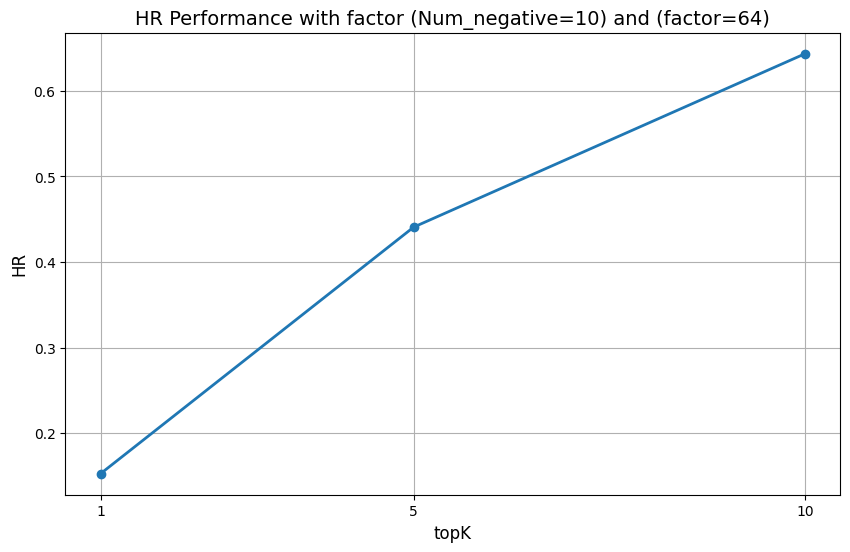

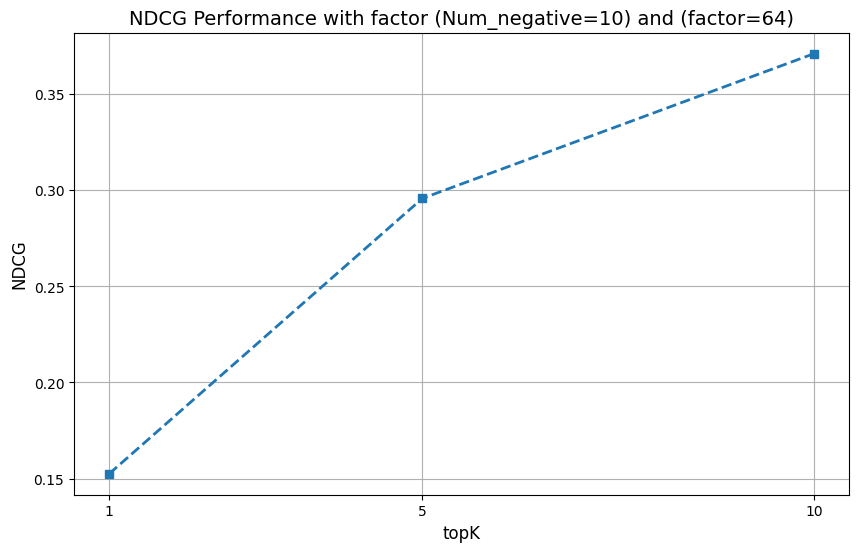

In [67]:
# Filter the data for num_negative=10 and topK=10
factor_data = df[(df["num_negative"] == 10) & (df["factor"] == 64)]
print(factor_data)

# Group the data by factor and calculate the mean for each group
grouped_by_negative_16 = factor_data.groupby("topK").mean()
print(grouped_by_negative_16)

# Plot HR
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_negative_16.index, grouped_by_negative_16["HR"], marker='o', linestyle='-', linewidth=2)
plt.title("HR Performance with factor (Num_negative=10) and (factor=64)", fontsize=14)
plt.xlabel("topK", fontsize=12)
plt.ylabel("HR", fontsize=12)
plt.grid(True)
plt.xticks(grouped_by_negative_16.index)
plt.savefig("./chart/reproduce/hr_performance_topK.png", dpi=300)  # Save chart as PNG
plt.show()

# Plot NDCG
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_negative_16.index, grouped_by_negative_16["NDCG"], marker='s', linestyle='--', linewidth=2)
plt.title("NDCG Performance with factor (Num_negative=10) and (factor=64)", fontsize=14)
plt.xlabel("topK", fontsize=12)
plt.ylabel("NDCG", fontsize=12)
plt.grid(True)
plt.xticks(grouped_by_negative_16.index)
plt.savefig("./chart/reproduce/ndcg_performance_topK.png", dpi=300)  # Save chart as PNG
plt.show()


In [51]:
df

,factor,num_negative,topK,loss,HR,NDCG
0,8,1,1,0.4314,0.1127,0.1127
1,8,1,5,0.6936,0.3493,0.2275
2,8,1,10,3.5628,0.5300,0.2844
3,8,5,1,2.1075,0.1235,0.1235
4,8,5,5,0.3445,0.3300,0.2214
5,8,5,10,2.3902,0.5399,0.3043
6,8,10,1,3.4957,0.1156,0.1156
7,8,10,5,0.3646,0.3715,0.2462
8,8,10,10,1.5483,0.5553,0.3120
9,16,1,1,0.4048,0.1255,0.1255


# Reproduce result

## HR and NDCG Performance with factor

    factor  num_negative  topK    loss      HR    NDCG
8        8            10    10  1.5483  0.5553  0.3120
17      16            10    10  0.2198  0.6031  0.3471
26      32            10    10  0.3124  0.6146  0.3563
35      64            10    10  0.1959  0.6434  0.3711
        num_negative  topK    loss      HR    NDCG
factor                                            
8               10.0  10.0  1.5483  0.5553  0.3120
16              10.0  10.0  0.2198  0.6031  0.3471
32              10.0  10.0  0.3124  0.6146  0.3563
64              10.0  10.0  0.1959  0.6434  0.3711


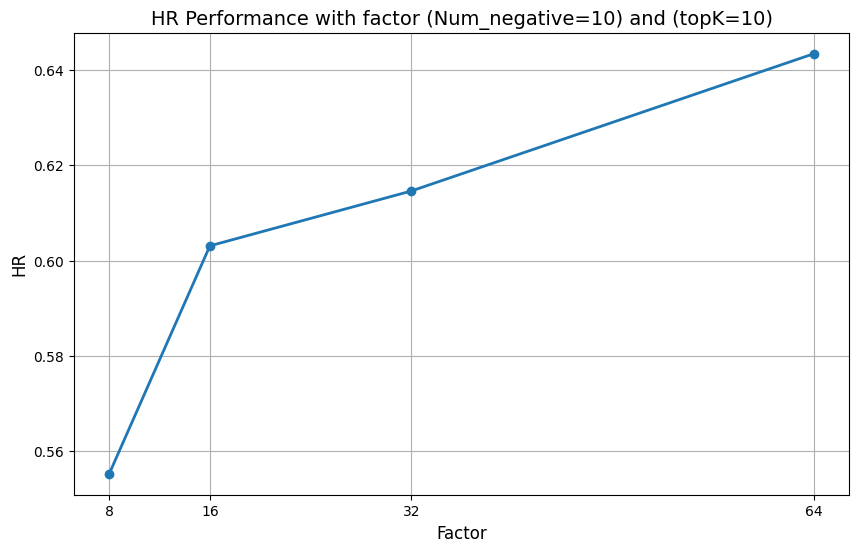

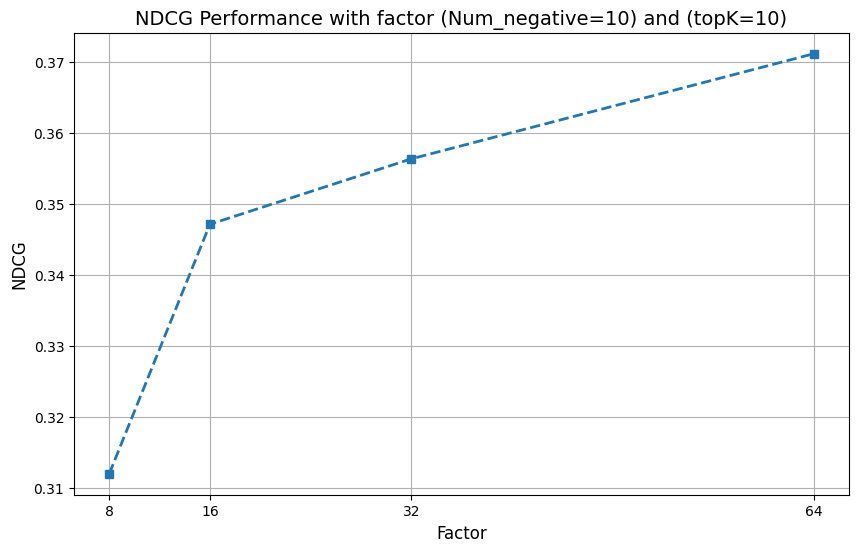

In [62]:
# Filter the data for num_negative=10 and topK=10
factor_data = df[(df["num_negative"] == 10) & (df["topK"] == 10)]
print(factor_data)

# Group the data by factor and calculate the mean for each group
grouped_by_negative_16 = factor_data.groupby("factor").mean()
print(grouped_by_negative_16)

# Plot HR
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_negative_16.index, grouped_by_negative_16["HR"], marker='o', linestyle='-', linewidth=2)
plt.title("HR Performance with factor (Num_negative=10) and (topK=10)", fontsize=14)
plt.xlabel("Factor", fontsize=12)
plt.ylabel("HR", fontsize=12)
plt.grid(True)
plt.xticks(grouped_by_negative_16.index)
plt.savefig("./chart/reproduce/hr_performance_factors.png", dpi=300)  # Save chart as PNG
plt.show()

# Plot NDCG
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_negative_16.index, grouped_by_negative_16["NDCG"], marker='s', linestyle='--', linewidth=2)
plt.title("NDCG Performance with factor (Num_negative=10) and (topK=10)", fontsize=14)
plt.xlabel("Factor", fontsize=12)
plt.ylabel("NDCG", fontsize=12)
plt.grid(True)
plt.xticks(grouped_by_negative_16.index)
plt.savefig("./chart/reproduce/ndcg_performance_factors.png", dpi=300)  # Save chart as PNG
plt.show()


## HR and NDCG Performance with num_negative

    factor  num_negative  topK    loss      HR    NDCG
29      64             1    10  0.4077  0.5675  0.3177
32      64             5    10  0.3144  0.6328  0.3653
35      64            10    10  0.1959  0.6434  0.3711
              factor  topK    loss      HR    NDCG
num_negative                                      
1               64.0  10.0  0.4077  0.5675  0.3177
5               64.0  10.0  0.3144  0.6328  0.3653
10              64.0  10.0  0.1959  0.6434  0.3711


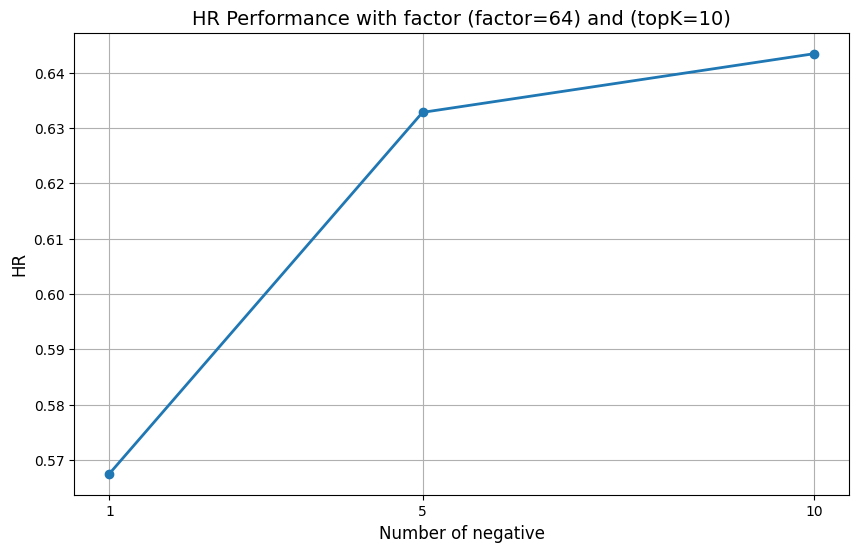

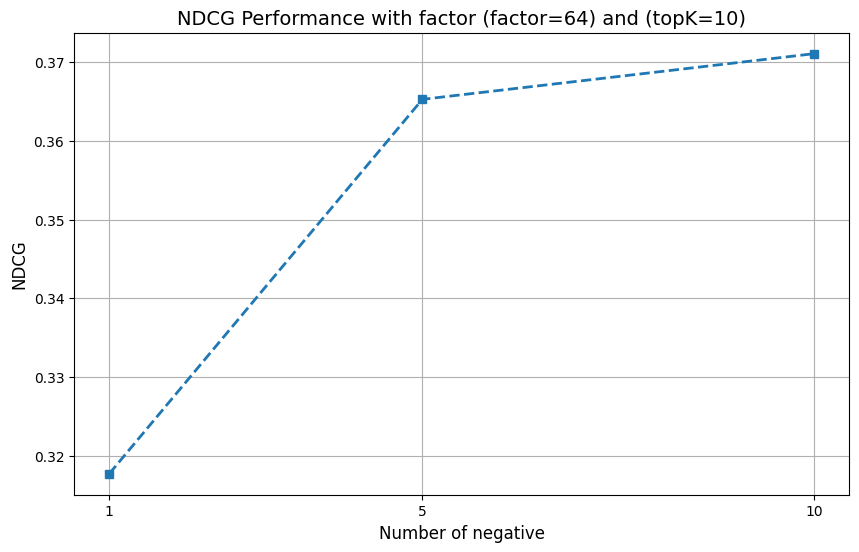

In [86]:
# Filter the data for num_negative=10 and topK=10
factor_data = df[(df["factor"] == 64) & (df["topK"] == 10)]
print(factor_data)

# Group the data by factor and calculate the mean for each group
grouped_by_negative_16 = factor_data.groupby("num_negative").mean()
print(grouped_by_negative_16)

# Plot HR
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_negative_16.index, grouped_by_negative_16["HR"], marker='o', linestyle='-', linewidth=2)
plt.title("HR Performance with factor (factor=64) and (topK=10)", fontsize=14)
plt.xlabel("Number of negative", fontsize=12)
plt.ylabel("HR", fontsize=12)
plt.grid(True)
plt.xticks(grouped_by_negative_16.index)
plt.savefig("./chart/reproduce/hr_performance_num_negative.png", dpi=300)  # Save chart as PNG
plt.show()

# Plot NDCG
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_negative_16.index, grouped_by_negative_16["NDCG"], marker='s', linestyle='--', linewidth=2)
plt.title("NDCG Performance with factor (factor=64) and (topK=10)", fontsize=14)
plt.xlabel("Number of negative", fontsize=12)
plt.ylabel("NDCG", fontsize=12)
plt.grid(True)
plt.xticks(grouped_by_negative_16.index)
plt.savefig("./chart/reproduce/ndcg_performance_num_negative.png", dpi=300)  # Save chart as PNG
plt.show()


In [115]:
# Read the two datasets
df_no_activity_layer = pd.read_csv("./experement-result/grid_search_no_activity_layer.csv")
df_activity_layer = pd.read_csv("./experement-result/grid_search_activity_layer.csv")

# Combine the datasets
df_combined = pd.concat([df_no_activity_layer, df_activity_layer], ignore_index=True)
df_combined.to_csv("./experement-result/ncf_comparison.csv", index=False)


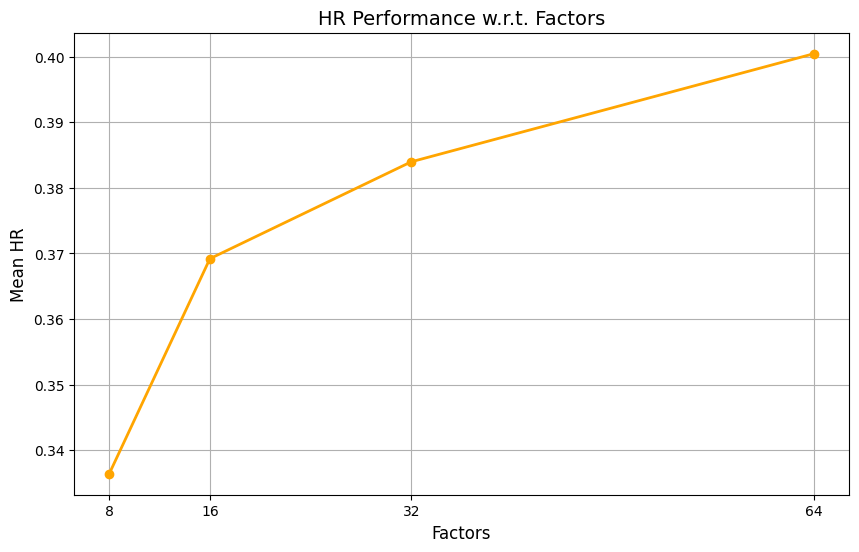

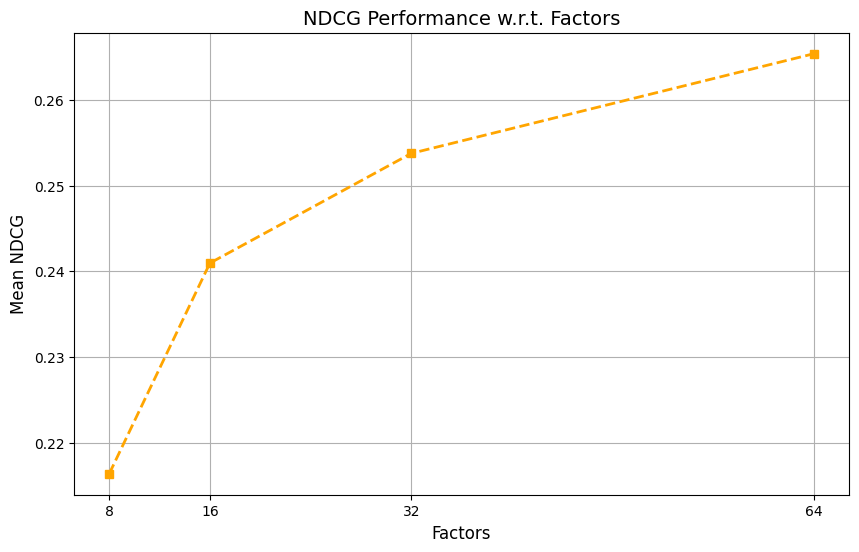

In [11]:
# Group the data by factor and calculate the mean for each group
grouped_by_factor = df.groupby("factor").mean()

# Plot HR
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_factor.index, grouped_by_factor["HR"], marker='o', linestyle='-', linewidth=2,color='orange')
plt.title("HR Performance w.r.t. Factors", fontsize=14)
plt.xlabel("Factors", fontsize=12)
plt.ylabel("Mean HR", fontsize=12)
plt.grid(True)
plt.xticks(grouped_by_factor.index)
plt.savefig("hr_performance_by_factors.png")  # Save chart as PNG
plt.show()

# Plot NDCG
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_factor.index, grouped_by_factor["NDCG"], marker='s', linestyle='--', linewidth=2,color='orange')
plt.title("NDCG Performance w.r.t. Factors", fontsize=14)
plt.xlabel("Factors", fontsize=12)
plt.ylabel("Mean NDCG", fontsize=12)
plt.grid(True)
plt.xticks(grouped_by_factor.index)
plt.savefig("ndcg_performance_by_factors.png")  # Save chart as PNG
plt.show()



In [21]:
print(df_combined)

    factor  num_negative  topK    loss      HR    NDCG               type
0        8             1     1  1.1044  0.0158  0.0158  no activity layer
1        8             1     5  1.1833  0.0586  0.0344  no activity layer
2        8             1    10  1.0680  0.1408  0.0629  no activity layer
3        8             5     1  0.4045  0.0451  0.0451  no activity layer
4        8             5     5  0.4124  0.1685  0.1062  no activity layer
..     ...           ...   ...     ...     ...     ...                ...
67      64             5     5  0.4013  0.1600  0.0983     activity layer
68      64             5    10  0.4144  0.2784  0.1407     activity layer
69      64            10     1  0.2792  0.0463  0.0463     activity layer
70      64            10     5  0.2644  0.2094  0.1352     activity layer
71      64            10    10  0.2688  0.3251  0.1626     activity layer

[72 rows x 7 columns]


   num_negative               type  factor      topK      loss        HR  \
0             1     activity layer    30.0  5.333333  1.084942  0.084733   
1             1  no activity layer    30.0  5.333333  1.312617  0.076942   
2             5     activity layer    30.0  5.333333  0.410917  0.164567   
3             5  no activity layer    30.0  5.333333  0.423742  0.148433   
4            10     activity layer    30.0  5.333333  0.271900  0.193800   
5            10  no activity layer    30.0  5.333333  0.273100  0.191317   

       NDCG  
0  0.049617  
1  0.041450  
2  0.098125  
3  0.088600  
4  0.118833  
5  0.116258  


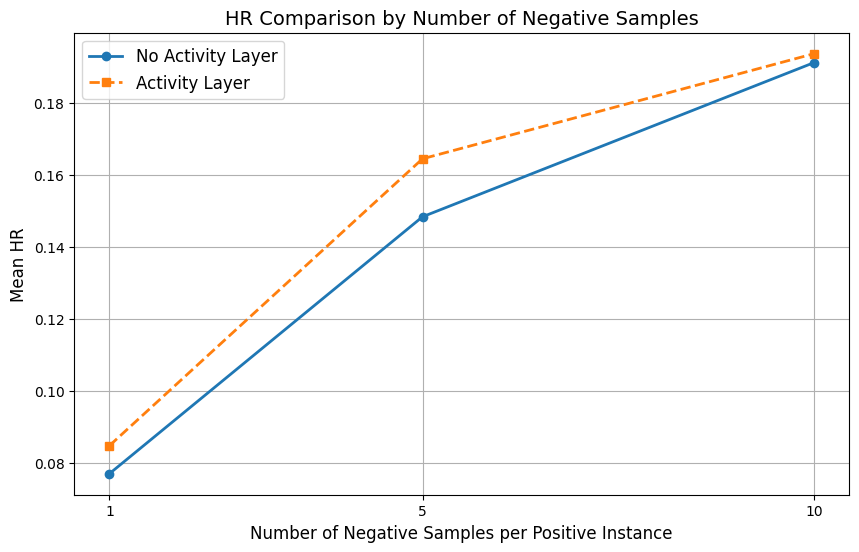

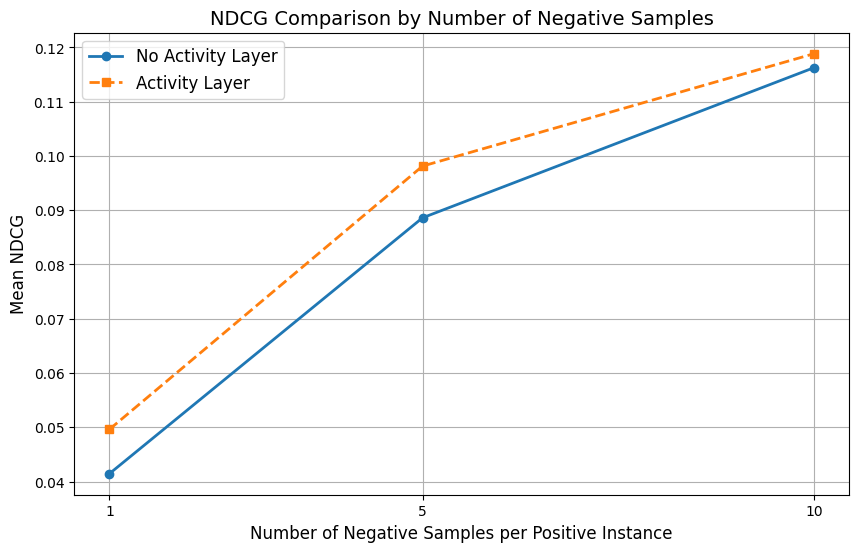

In [22]:
df_combined = pd.read_csv("./experement-result/ncf_comparison.csv")

# Group the data by num_negative and type, then calculate the mean for HR and NDCG
grouped_data = df_combined.groupby(["num_negative", "type"]).mean().reset_index()
print(grouped_data)
# Separate data by type
no_activity_data = grouped_data[grouped_data["type"] == "no activity layer"]
activity_data = grouped_data[grouped_data["type"] == "activity layer"]

# Plot HR comparison
plt.figure(figsize=(10, 6))
plt.plot(no_activity_data["num_negative"], no_activity_data["HR"], marker='o', linestyle='-', label="No Activity Layer", linewidth=2)
plt.plot(activity_data["num_negative"], activity_data["HR"], marker='s', linestyle='--', label="Activity Layer", linewidth=2)
plt.title("HR Comparison by Number of Negative Samples", fontsize=14)
plt.xlabel("Number of Negative Samples per Positive Instance", fontsize=12)
plt.ylabel("Mean HR", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(grouped_data["num_negative"].unique())
plt.savefig("hr_comparison_num_negative.png")  # Save chart as PNG
plt.show()

# Plot NDCG comparison
plt.figure(figsize=(10, 6))
plt.plot(no_activity_data["num_negative"], no_activity_data["NDCG"], marker='o', linestyle='-', label="No Activity Layer", linewidth=2)
plt.plot(activity_data["num_negative"], activity_data["NDCG"], marker='s', linestyle='--', label="Activity Layer", linewidth=2)
plt.title("NDCG Comparison by Number of Negative Samples", fontsize=14)
plt.xlabel("Number of Negative Samples per Positive Instance", fontsize=12)
plt.ylabel("Mean NDCG", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(grouped_data["num_negative"].unique())
plt.savefig("ndcg_comparison_num_negative.png")  # Save chart as PNG
plt.show()



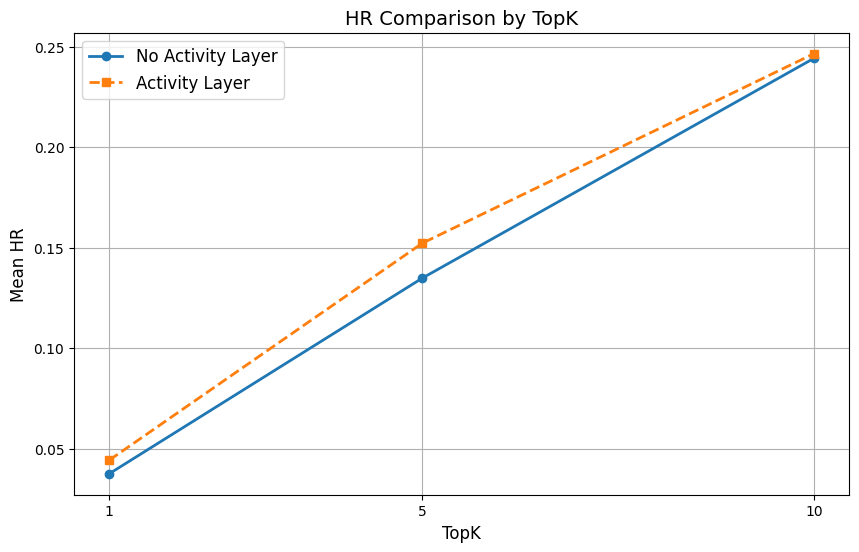

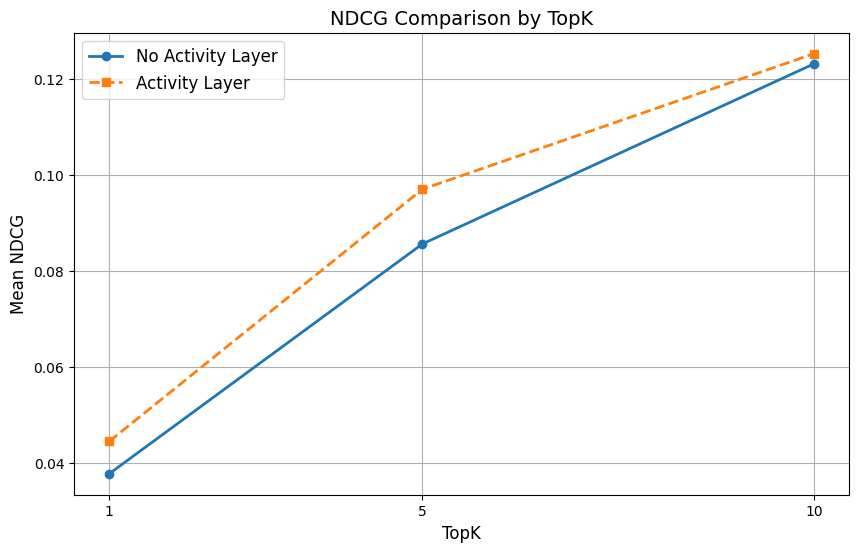

In [23]:
# Group the data by topK and type, then calculate the mean for HR and NDCG
grouped_data_topK = df_combined.groupby(["topK", "type"]).mean().reset_index()

# Separate data by type
no_activity_data_topK = grouped_data_topK[grouped_data_topK["type"] == "no activity layer"]
activity_data_topK = grouped_data_topK[grouped_data_topK["type"] == "activity layer"]

# Plot HR comparison for topK
plt.figure(figsize=(10, 6))
plt.plot(no_activity_data_topK["topK"], no_activity_data_topK["HR"], marker='o', linestyle='-', label="No Activity Layer", linewidth=2)
plt.plot(activity_data_topK["topK"], activity_data_topK["HR"], marker='s', linestyle='--', label="Activity Layer", linewidth=2)
plt.title("HR Comparison by TopK", fontsize=14)
plt.xlabel("TopK", fontsize=12)
plt.ylabel("Mean HR", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(grouped_data_topK["topK"].unique())
plt.savefig("hr_comparison_topK.png")  # Save chart as PNG
plt.show()

# Plot NDCG comparison for topK
plt.figure(figsize=(10, 6))
plt.plot(no_activity_data_topK["topK"], no_activity_data_topK["NDCG"], marker='o', linestyle='-', label="No Activity Layer", linewidth=2)
plt.plot(activity_data_topK["topK"], activity_data_topK["NDCG"], marker='s', linestyle='--', label="Activity Layer", linewidth=2)
plt.title("NDCG Comparison by TopK", fontsize=14)
plt.xlabel("TopK", fontsize=12)
plt.ylabel("Mean NDCG", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(grouped_data_topK["topK"].unique())
plt.savefig("ndcg_comparison_topK.png")  # Save chart as PNG
plt.show()



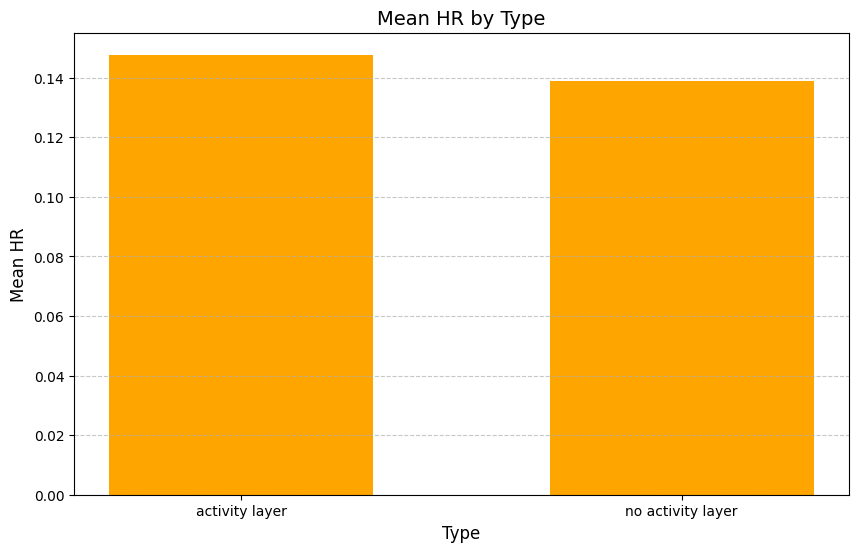

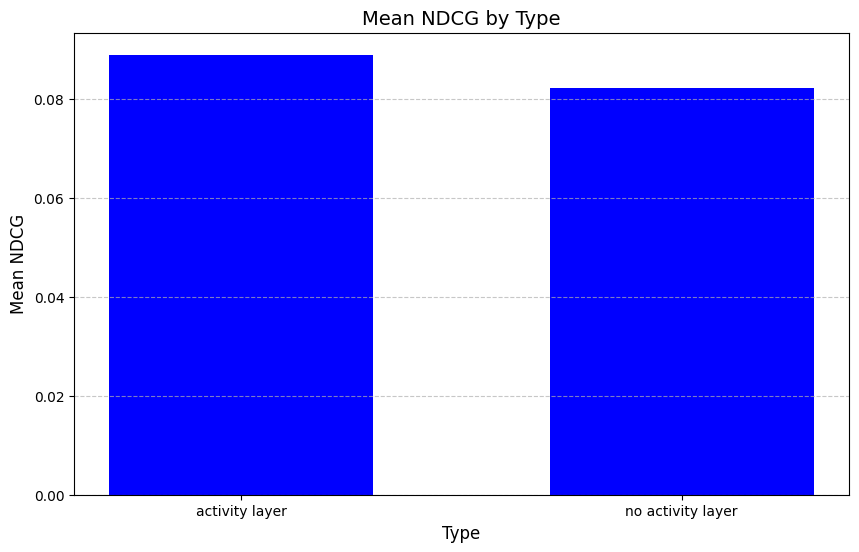

In [24]:
# Plot HR bar chart by type
df_combined = pd.read_csv("./experement-result/ncf_comparison.csv")
mean_values = df_combined.groupby("type")[["HR", "NDCG"]].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mean_values["type"], mean_values["HR"], color='orange', width=0.6)
plt.title("Mean HR by Type", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Mean HR", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("mean_hr_barchart.png")  # Save HR chart
plt.show()

# Plot NDCG bar chart by type
plt.figure(figsize=(10, 6))
plt.bar(mean_values["type"], mean_values["NDCG"], color='blue', width=0.6)
plt.title("Mean NDCG by Type", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Mean NDCG", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("mean_ndcg_barchart.png")  # Save NDCG chart
plt.show()



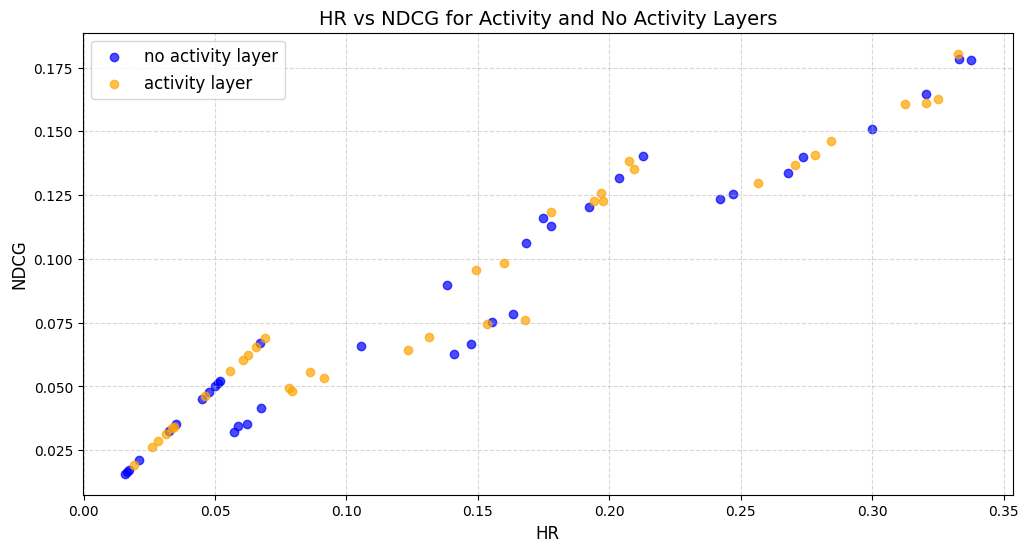

In [25]:
# Plot HR vs NDCG for both types with blue and orange colors
plt.figure(figsize=(12, 6))
colors = {"no activity layer": "blue", "activity layer": "orange"}

for t in df_combined["type"].unique():
    subset = df_combined[df_combined["type"] == t]
    plt.scatter(subset["HR"], subset["NDCG"], label=t, alpha=0.7, color=colors[t])

plt.title("HR vs NDCG for Activity and No Activity Layers", fontsize=14)
plt.xlabel("HR", fontsize=12)
plt.ylabel("NDCG", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.savefig("hr_vs_ndcg_blue_orange.png")
plt.show()



In [29]:
from scipy.stats import ttest_rel, wilcoxon

# Separate the HR and NDCG values by type
hr_no_activity = df_combined[df_combined["type"] == "no activity layer"]["HR"]
hr_activity = df_combined[df_combined["type"] == "activity layer"]["HR"]

ndcg_no_activity = df_combined[df_combined["type"] == "no activity layer"]["NDCG"]
ndcg_activity = df_combined[df_combined["type"] == "activity layer"]["NDCG"]

# Perform paired t-test for HR
t_stat_hr, p_value_hr = ttest_rel(hr_no_activity, hr_activity)

# Perform paired t-test for NDCG
t_stat_ndcg, p_value_ndcg = ttest_rel(ndcg_no_activity, ndcg_activity)

# Perform Wilcoxon signed-rank test for HR
w_stat_hr, w_p_value_hr = wilcoxon(hr_no_activity, hr_activity)

# Perform Wilcoxon signed-rank test for NDCG
w_stat_ndcg, w_p_value_ndcg = wilcoxon(ndcg_no_activity, ndcg_activity)

# Create a summary of the results
statistical_results = {
    "Metric": ["HR", "NDCG"],
    "t-test (p-value)": [p_value_hr, p_value_ndcg],
    "Wilcoxon (p-value)": [w_p_value_hr, w_p_value_ndcg],
}

import pandas as pd
statistical_results_df = pd.DataFrame(statistical_results)

print(statistical_results_df)

  Metric  t-test (p-value)  Wilcoxon (p-value)
0     HR          0.035433            0.066797
1   NDCG          0.011553            0.021901


In [31]:
from scipy.stats import ttest_rel

# สมมติว่าข้อมูล HR และ NDCG สำหรับทั้งสองวิธีมีอยู่ใน df_combined
t_stat_hr, p_value_hr = ttest_rel(hr_activity, hr_no_activity, alternative="greater")
t_stat_ndcg, p_value_ndcg = ttest_rel(ndcg_activity, ndcg_no_activity, alternative="greater")


In [34]:
p_value_hr

0.017716374158552314

In [35]:
p_value_ndcg

0.005776566565558507

In [114]:
print(df_combined)

    Iteration      HR    NDCG    loss               type
0           0  0.2638  0.1442  0.6546  no activity layer
1           1  0.3047  0.1603  0.4849  no activity layer
2           2  0.3182  0.1681  0.4569  no activity layer
3           3  0.3155  0.1710  0.4489  no activity layer
4           4  0.3344  0.1797  0.4480  no activity layer
..        ...     ...     ...     ...                ...
45         45  0.1145  0.0804  2.9750     activity layer
46         46  0.1288  0.0878  2.9714     activity layer
47         47  0.1327  0.0890  2.9626     activity layer
48         48  0.1373  0.0901  2.9646     activity layer
49         49  0.0860  0.0582  3.0050     activity layer

[100 rows x 5 columns]


    factor  num_negative  topK    loss      HR    NDCG               type
8        8            10    10  0.2857  0.3000  0.1508  no activity layer
17      16            10    10  0.2685  0.3374  0.1779  no activity layer
26      32            10    10  0.2729  0.3332  0.1783  no activity layer
35      64            10    10  0.2692  0.3205  0.1645  no activity layer
44       8            10    10  0.2696  0.3124  0.1607     activity layer
53      16            10    10  0.2721  0.3205  0.1610     activity layer
62      32            10    10  0.2646  0.3328  0.1804     activity layer
71      64            10    10  0.2688  0.3251  0.1626     activity layer


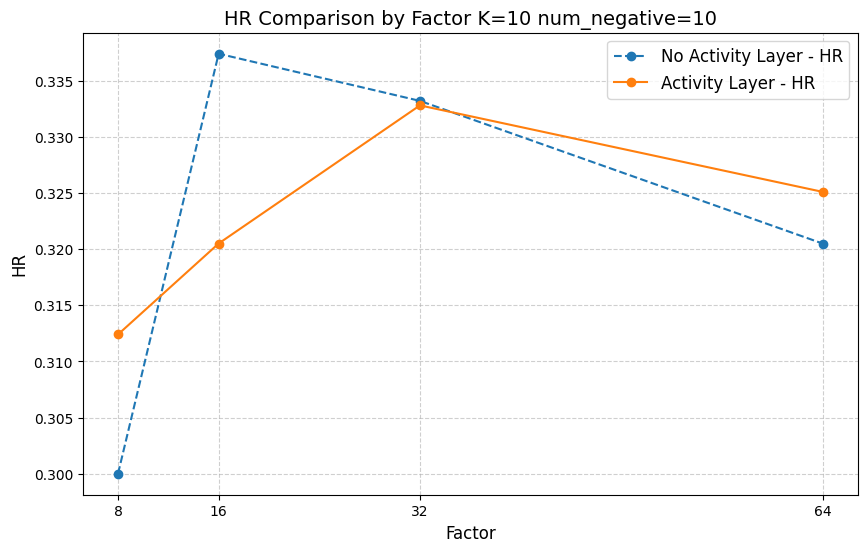

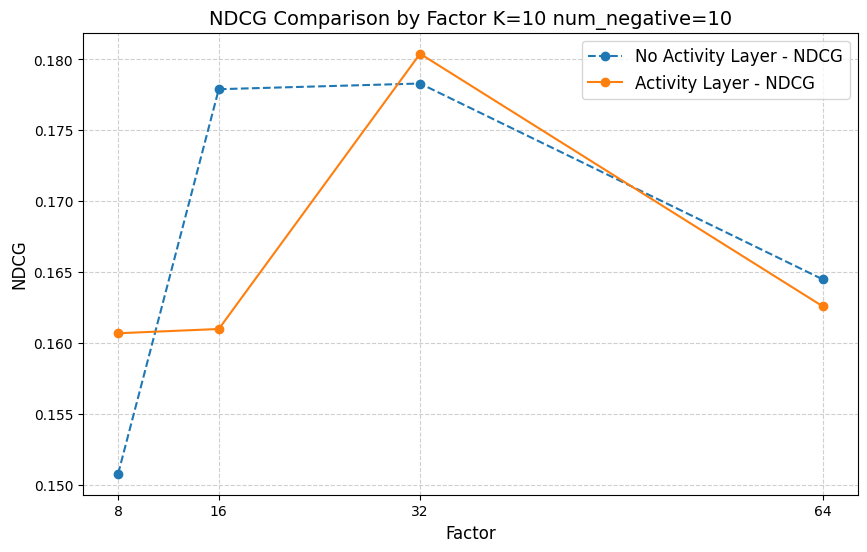

In [117]:
import matplotlib.pyplot as plt

# Filter data where num_negative = 10 and topK = 10
filtered_data = df_combined[(df_combined["num_negative"] == 10) & (df_combined["topK"] == 10)]

# Create separate dataframes for each type
no_activity_layer = filtered_data[filtered_data["type"] == "no activity layer"]
activity_layer = filtered_data[filtered_data["type"] == "activity layer"]
print(filtered_data)
# Adjust the x-axis ticks to be specific values (8, 16, 32, 64)
plt.figure(figsize=(10, 6))
plt.plot(no_activity_layer["factor"], no_activity_layer["HR"], marker='o', label="No Activity Layer - HR", linestyle='--')
plt.plot(activity_layer["factor"], activity_layer["HR"], marker='o', label="Activity Layer - HR", linestyle='-')
plt.title("HR Comparison by Factor K=10 num_negative=10", fontsize=14)
plt.xlabel("Factor", fontsize=12)
plt.ylabel("HR", fontsize=12)
plt.xticks([8, 16, 32, 64], labels=[8, 16, 32, 64])  # Set x-axis ticks
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("./chart/hr_factor.png",dpi=300)
plt.show()

# NDCG plot with adjusted x-axis
plt.figure(figsize=(10, 6))
plt.plot(no_activity_layer["factor"], no_activity_layer["NDCG"], marker='o', label="No Activity Layer - NDCG", linestyle='--')
plt.plot(activity_layer["factor"], activity_layer["NDCG"], marker='o', label="Activity Layer - NDCG", linestyle='-')
plt.title("NDCG Comparison by Factor K=10 num_negative=10", fontsize=14)
plt.xlabel("Factor", fontsize=12)
plt.ylabel("NDCG", fontsize=12)
plt.xticks([8, 16, 32, 64], labels=[8, 16, 32, 64])  # Set x-axis ticks
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("./chart/ndcg_factor.png",dpi=300)
plt.show()



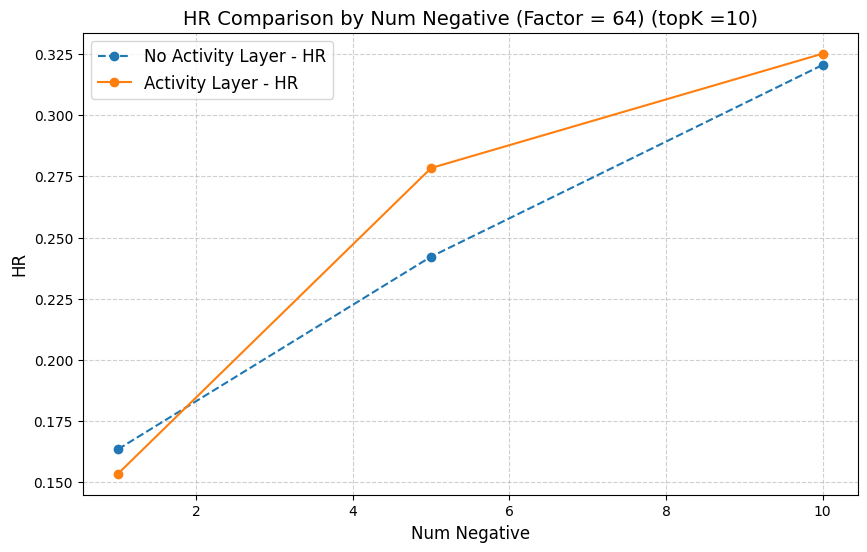

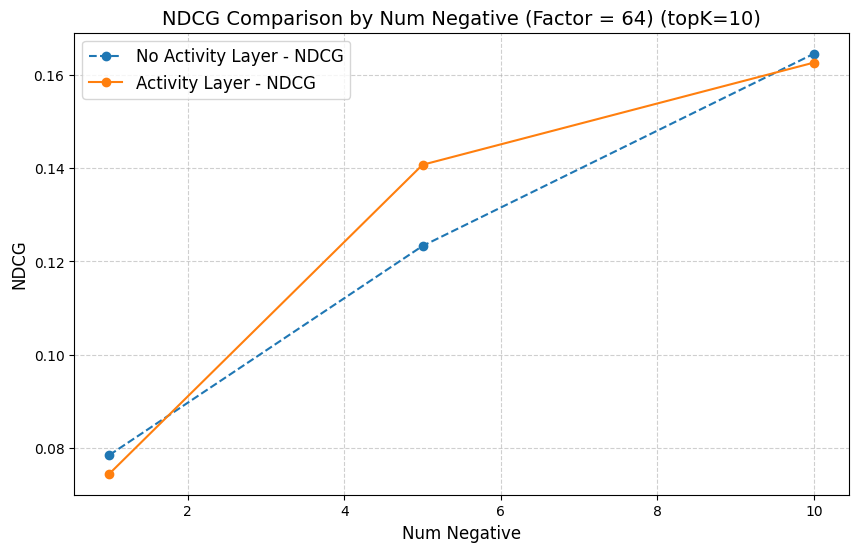

In [118]:
# Filter data where factor = 32 and topK = 10
filtered_data_num_negative = df_combined[(df_combined["factor"] == 64) & (df_combined["topK"] == 10)]

# Create separate dataframes for each type
no_activity_layer_num_negative = filtered_data_num_negative[filtered_data_num_negative["type"] == "no activity layer"]
activity_layer_num_negative = filtered_data_num_negative[filtered_data_num_negative["type"] == "activity layer"]



# Create separate dataframes for each type
no_activity_layer_num_negative = filtered_data_num_negative[filtered_data_num_negative["type"] == "no activity layer"]
activity_layer_num_negative = filtered_data_num_negative[filtered_data_num_negative["type"] == "activity layer"]

# Plot HR comparison
plt.figure(figsize=(10, 6))
plt.plot(no_activity_layer_num_negative["num_negative"], no_activity_layer_num_negative["HR"], marker='o', label="No Activity Layer - HR", linestyle='--')
plt.plot(activity_layer_num_negative["num_negative"], activity_layer_num_negative["HR"], marker='o', label="Activity Layer - HR", linestyle='-')
plt.title("HR Comparison by Num Negative (Factor = 64) (topK =10)", fontsize=14)
plt.xlabel("Num Negative", fontsize=12)
plt.ylabel("HR", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("./chart/hr_num_negative.png",dpi=300)
plt.show()

# Plot NDCG comparison
plt.figure(figsize=(10, 6))
plt.plot(no_activity_layer_num_negative["num_negative"], no_activity_layer_num_negative["NDCG"], marker='o', label="No Activity Layer - NDCG", linestyle='--')
plt.plot(activity_layer_num_negative["num_negative"], activity_layer_num_negative["NDCG"], marker='o', label="Activity Layer - NDCG", linestyle='-')
plt.title("NDCG Comparison by Num Negative (Factor = 64) (topK=10)", fontsize=14)
plt.xlabel("Num Negative", fontsize=12)
plt.ylabel("NDCG", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("./chart/ndcg_num_negative.png",dpi=300)
plt.show()

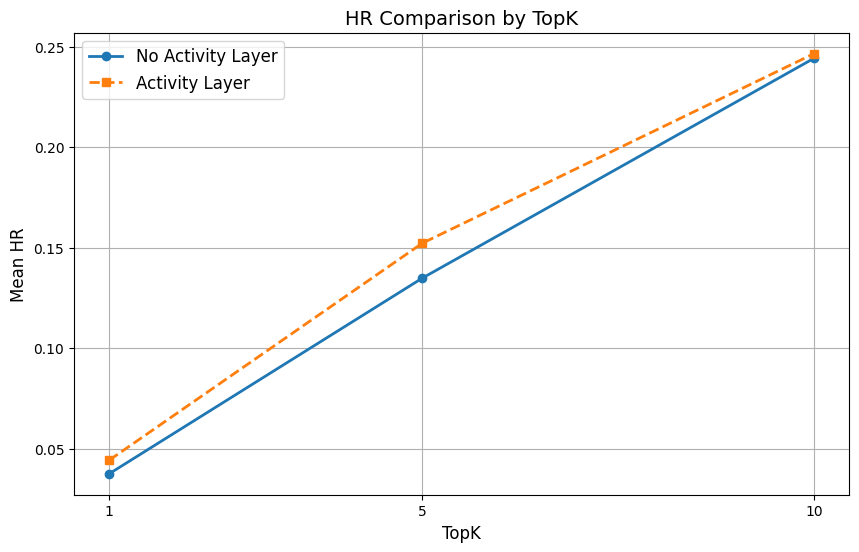

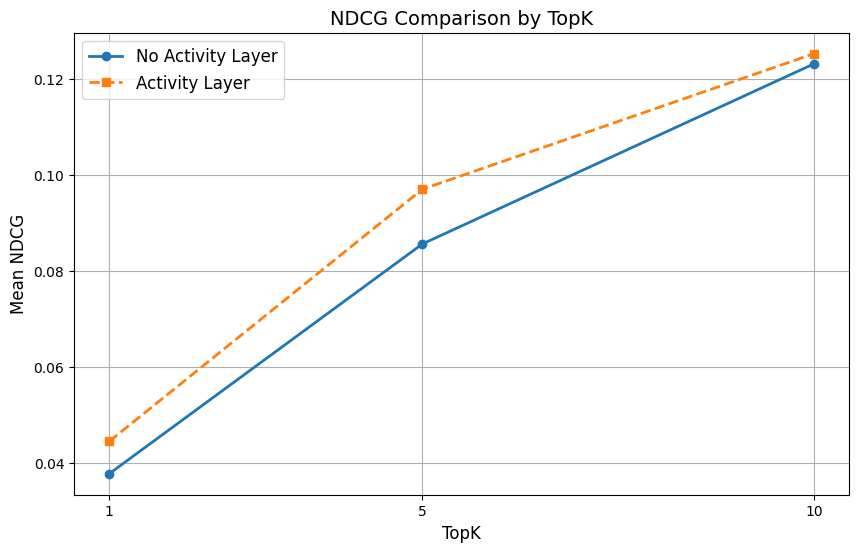

In [119]:
# Group the data by topK and type, then calculate the mean for HR and NDCG
grouped_data_topK = df_combined.groupby(["topK", "type"]).mean().reset_index()

# Separate data by type
no_activity_data_topK = grouped_data_topK[grouped_data_topK["type"] == "no activity layer"]
activity_data_topK = grouped_data_topK[grouped_data_topK["type"] == "activity layer"]

# Plot HR comparison for topK
plt.figure(figsize=(10, 6))
plt.plot(no_activity_data_topK["topK"], no_activity_data_topK["HR"], marker='o', linestyle='-', label="No Activity Layer", linewidth=2)
plt.plot(activity_data_topK["topK"], activity_data_topK["HR"], marker='s', linestyle='--', label="Activity Layer", linewidth=2)
plt.title("HR Comparison by TopK", fontsize=14)
plt.xlabel("TopK", fontsize=12)
plt.ylabel("Mean HR", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(grouped_data_topK["topK"].unique())
plt.savefig("hr_comparison_topK.png")  # Save chart as PNG
plt.show()

# Plot NDCG comparison for topK
plt.figure(figsize=(10, 6))
plt.plot(no_activity_data_topK["topK"], no_activity_data_topK["NDCG"], marker='o', linestyle='-', label="No Activity Layer", linewidth=2)
plt.plot(activity_data_topK["topK"], activity_data_topK["NDCG"], marker='s', linestyle='--', label="Activity Layer", linewidth=2)
plt.title("NDCG Comparison by TopK", fontsize=14)
plt.xlabel("TopK", fontsize=12)
plt.ylabel("Mean NDCG", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(grouped_data_topK["topK"].unique())
plt.savefig("ndcg_comparison_topK.png")  # Save chart as PNG
plt.show()



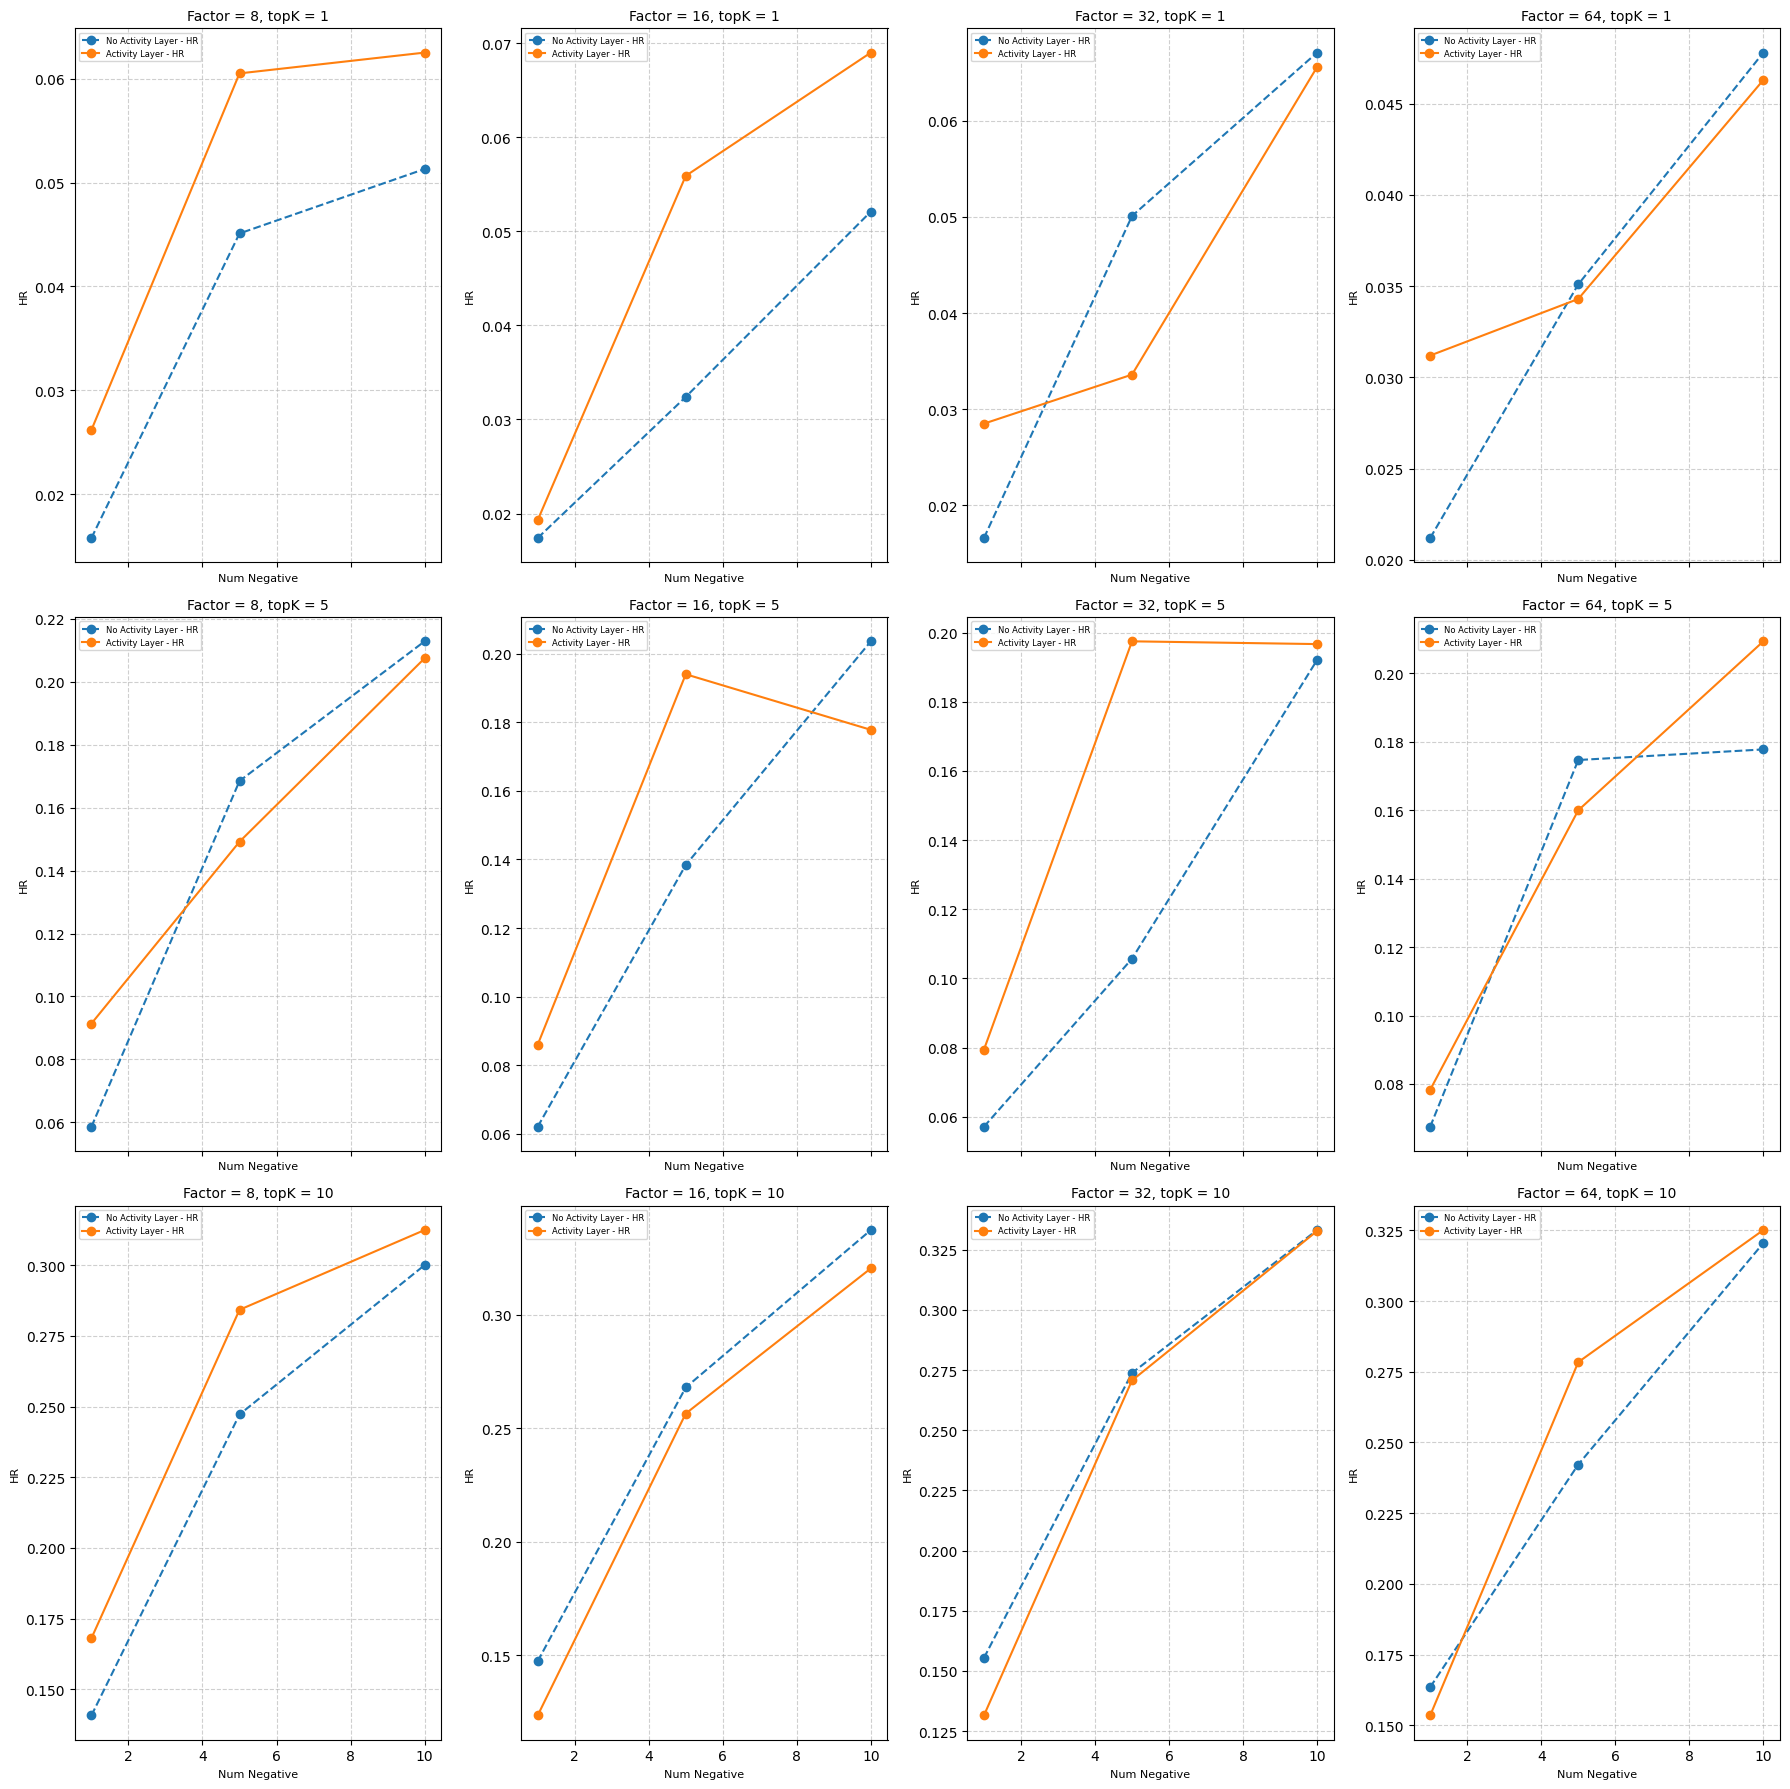

In [47]:
# Get unique values for topK and factor from the DataFrame
unique_topk = df["topK"].unique()
unique_factors = df["factor"].unique()

# Create subplots for each combination of topK and factor
fig, axes = plt.subplots(len(unique_topk), len(unique_factors), figsize=(18, 18), sharex=True, sharey=False)

for i, topk in enumerate(unique_topk):
    for j, factor in enumerate(unique_factors):
        # Filter data for the specific topK and factor
        filtered_data = df_combined[(df_combined["topK"] == topk) & (df_combined["factor"] == factor)]

        # Separate data by type
        no_activity_layer = filtered_data[filtered_data["type"] == "no activity layer"]
        activity_layer = filtered_data[filtered_data["type"] == "activity layer"]

        # Plot HR comparison
        ax = axes[i, j]
        ax.plot(
            no_activity_layer["num_negative"],
            no_activity_layer["HR"],
            marker='o',
            label="No Activity Layer - HR",
            linestyle='--'
        )
        ax.plot(
            activity_layer["num_negative"],
            activity_layer["HR"],
            marker='o',
            label="Activity Layer - HR",
            linestyle='-'
        )

        # Set titles and labels for each subplot
        ax.set_title(f"Factor = {factor}, topK = {topk}", fontsize=10)
        ax.set_xlabel("Num Negative", fontsize=8)
        ax.set_ylabel("HR", fontsize=8)
        ax.grid(True, linestyle="--", alpha=0.6)
        ax.legend(fontsize=6)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("hr_vs_factor_vs_topk.png", dpi=300)
plt.show()


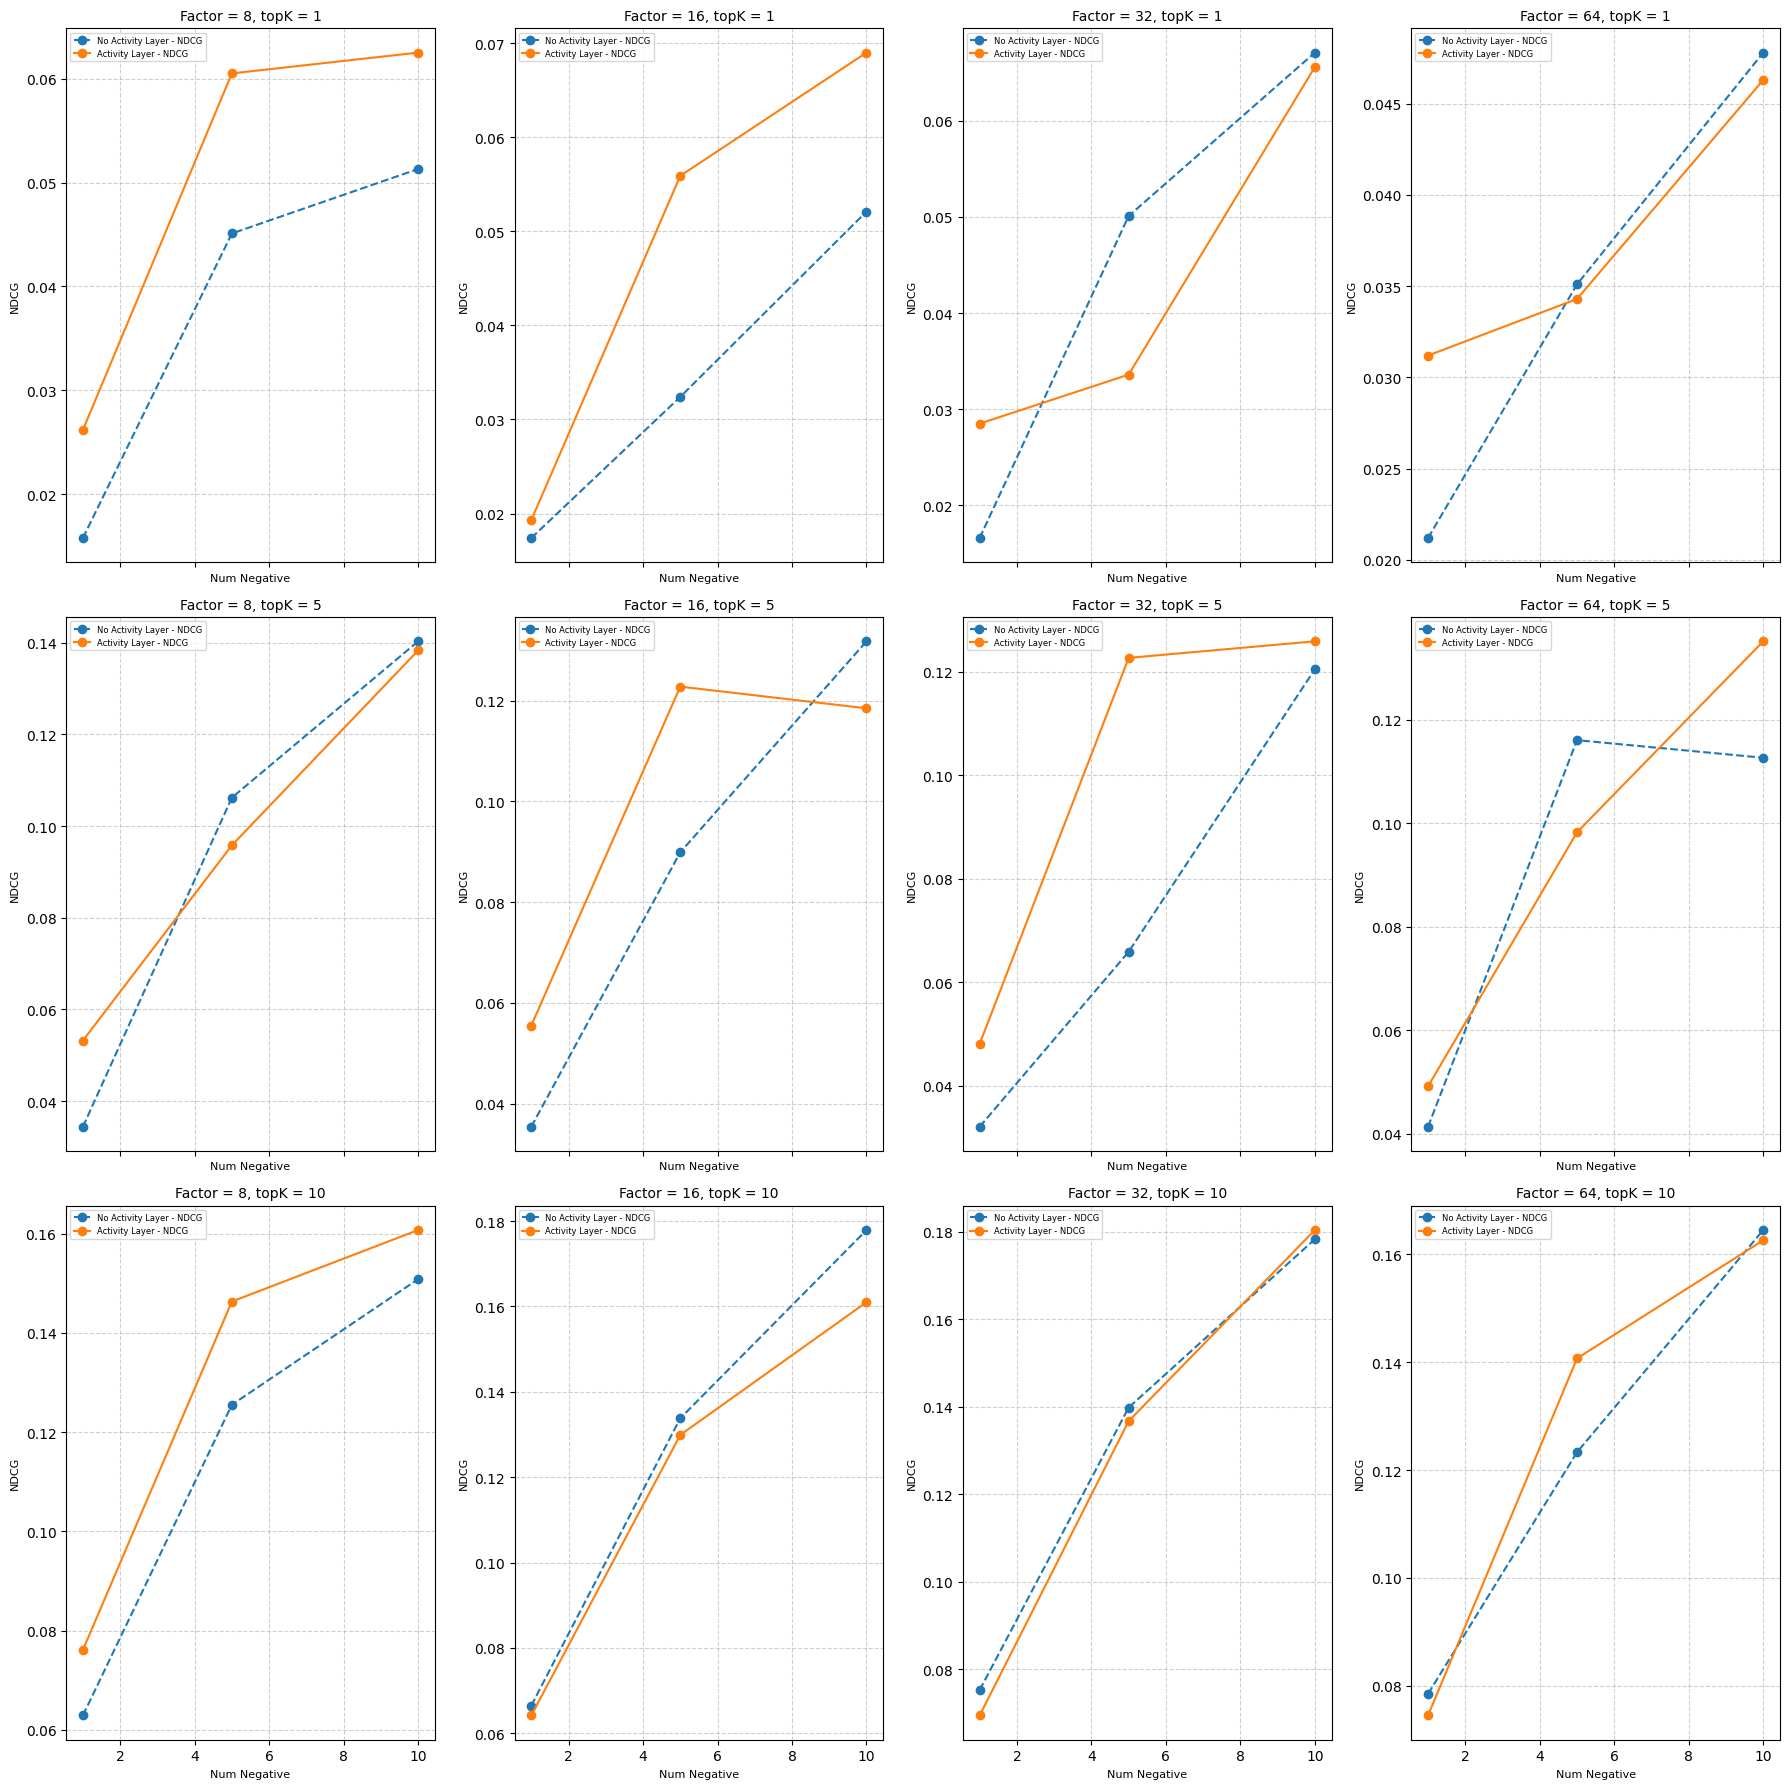

In [46]:
# Refactored code to plot NDCG instead of HR

# Get unique values for topK and factor from the DataFrame
unique_topk = df["topK"].unique()
unique_factors = df["factor"].unique()

# Create subplots for each combination of topK and factor
fig, axes = plt.subplots(len(unique_topk), len(unique_factors), figsize=(18, 18), sharex=True, sharey=False)

for i, topk in enumerate(unique_topk):
    for j, factor in enumerate(unique_factors):
        # Filter data for the specific topK and factor
        filtered_data = df_combined[(df_combined["topK"] == topk) & (df_combined["factor"] == factor)]

        # Separate data by type
        no_activity_layer = filtered_data[filtered_data["type"] == "no activity layer"]
        activity_layer = filtered_data[filtered_data["type"] == "activity layer"]

        # Plot NDCG comparison
        ax = axes[i, j]
        ax.plot(
            no_activity_layer["num_negative"],
            no_activity_layer["NDCG"],
            marker='o',
            label="No Activity Layer - NDCG",
            linestyle='--'
        )
        ax.plot(
            activity_layer["num_negative"],
            activity_layer["NDCG"],
            marker='o',
            label="Activity Layer - NDCG",
            linestyle='-'
        )

        # Set titles and labels for each subplot
        ax.set_title(f"Factor = {factor}, topK = {topk}", fontsize=10)
        ax.set_xlabel("Num Negative", fontsize=8)
        ax.set_ylabel("NDCG", fontsize=8)
        ax.grid(True, linestyle="--", alpha=0.6)
        ax.legend(fontsize=6)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("ndcg_vs_factor_vs_topk.png", dpi=300)
plt.show()


# Reproduce result

## Iteration vs HR, NDCG, and Loss

   Iteration    Loss      HR    NDCG
0          0  0.2620  0.4528  0.2515
1          1  0.2358  0.4864  0.2728
2          2  0.2363  0.4970  0.2797
3          3  0.2629  0.5086  0.2827
4          4  0.2890  0.5136  0.2901


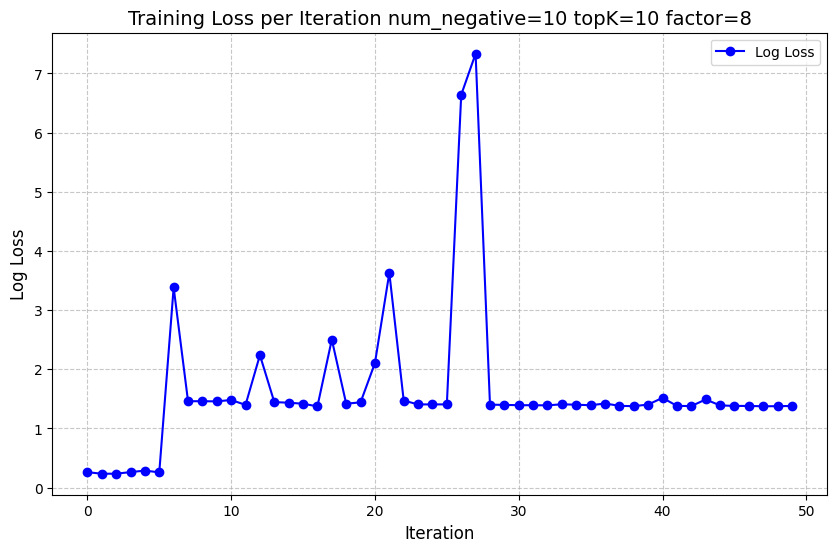

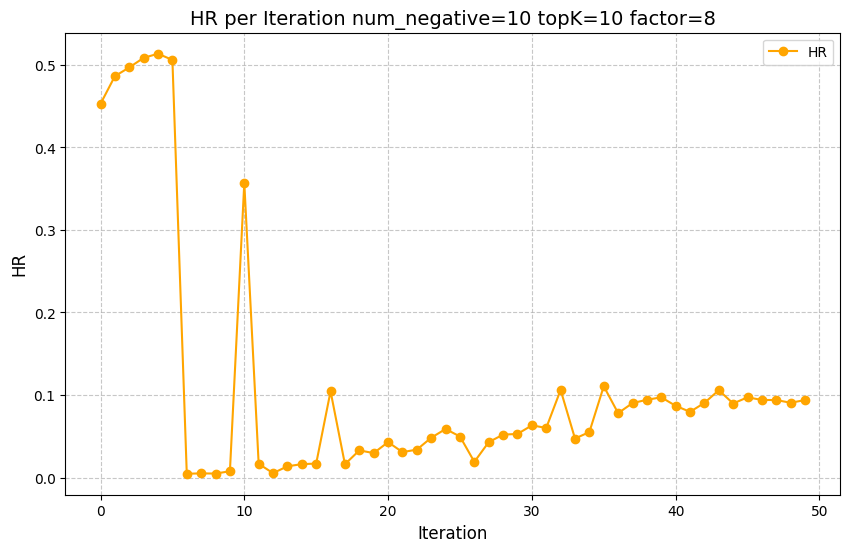

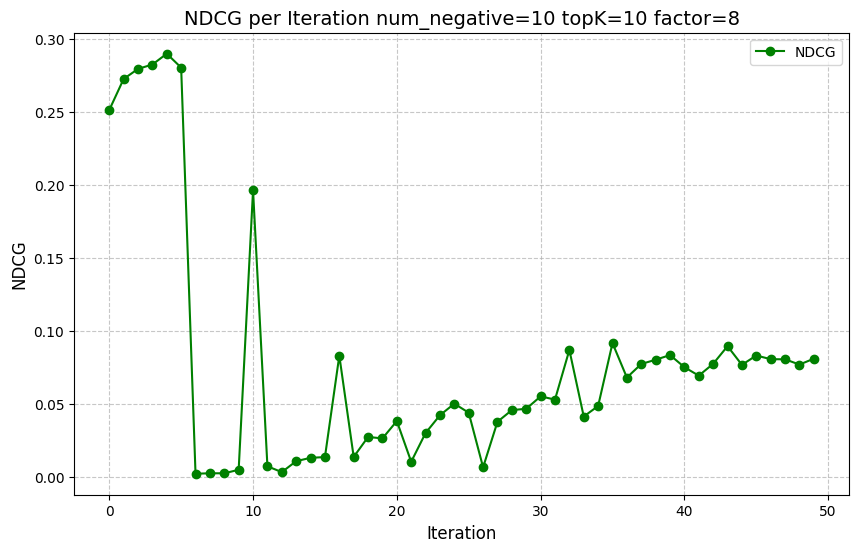

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = "experement-result/iteration_results.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("The file path does not exist. Please provide the correct path or upload the file.")

# Check the content of the DataFrame
print(df.head())

# Plot Log Loss per Iteration
plt.figure(figsize=(10, 6))
plt.plot(df["Iteration"], df["Loss"], marker="o", label="Log Loss", color="blue")
plt.title("Training Loss per Iteration num_negative=10 topK=10 factor=8", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.savefig("./chart/reproduce/iteration_vs_loss.png", dpi=300)
plt.show()

# Plot HR per Iteration num_negative=10 topK=10 factor=8
plt.figure(figsize=(10, 6))
plt.plot(df["Iteration"], df["HR"], marker="o", label="HR", color="orange")
plt.title("HR per Iteration num_negative=10 topK=10 factor=8", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("HR", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.savefig("./chart/reproduce/iteration_vs_hr.png", dpi=300)
plt.show()

# Plot NDCG per Iteration num_negative=10 topK=10 factor=8
plt.figure(figsize=(10, 6))
plt.plot(df["Iteration"], df["NDCG"], marker="o", label="NDCG", color="green")
plt.title("NDCG per Iteration num_negative=10 topK=10 factor=8", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("NDCG", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.savefig("./chart/reproduce/iteration_vs_ndcg.png", dpi=300)
plt.show()
